<a href="https://colab.research.google.com/github/SergioNietoP/machine-learning-datasheets/blob/main/Turf_Prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DataSheet Description**

---


En este proyecto emplearemos un dataset que contiene información de los resultados de las carreras de el panorama nacional de carreras de caballos.

- **Puesto** (Clase): Posición en la que terminan la carrera **int64**
- **NombreCaballo**: Nombre de caballo  **object**
- **Peso** : Peso de caballo  **object**
- **Edad**: Edad de caballo **int64**
- **DistanciaMeta**: Distancia respecto a ganador en llegada a meta **object** (DROPEAR)
- **Mantilla**: Dorsal   **int64**
- **Dividendo** : Pago por euro apostado por ganador de carrera **object** (DROPEAR)
- **Propietario** : Cuadra Propietaria **object**
- **Preparador**: Nombre Preparador **object**
- **Jinete**: Jinete o Amazona que monta al caballo en esta carrera  **object**
- **Problemas**: Problemas que posee en esta carrera el caballo  **object**
- **Fecha**: Fecha Carrera   **object**
- **Hora**: Hora carrera  **object**
- **Terreno**: Estado del terreno en carrera **object**
- **Distancia**: Longitud carrera  **float64**
- **Tipo**: Tipo de terreno en carrera  **object**
- **SentidoHipodromo**:  (0 -> Sentido Normal, 1 -> Inverso) **int64**
- **Meteorología**: Previsión estado meteorología del día entero **object** (Tiempo3)
- **Lluvia**: Previsión cantidad de lluvia del dia entero  **object**
- **Viento**: Previsión velocidad de viento del dia entero  **int64**
- **Temperatura**: Previsión de temp. del horario de la carrera  **int64**
- **Hipodromo**: Nombre del hipódromo de la carrera   **object**

In [451]:
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.compose
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

url = 'https://raw.githubusercontent.com/SergioNietoP/machine-learning-datasheets/main/Learning%20Datasheets/Turf%20Prediction/Data%20Turf%20Races%20Train%20-%2011.csv'

url1 = 'https://raw.githubusercontent.com/SergioNietoP/machine-learning-datasheets/main/Learning%20Datasheets/Turf%20Prediction/Data%20Turf%20Races%20Test%20-%204.csv'
test = pd.read_csv(url1, sep=',')

test_labels = test.pop('Puesto')


train = pd.read_csv(url, sep=',')

train = train.drop('DistanciaMeta', axis=1)
train = train.drop('Dividendo', axis=1)

ogData = train
train.head()
train.count()



Puesto              1486
NombreCaballo       1486
Peso                1486
Edad                1486
Mantilla            1486
Propietario         1486
Preparador          1486
Jinete              1486
Problemas            845
Fecha               1486
Hora                1486
Terreno             1486
Distancia           1486
Tipo                1485
SentidoHipodromo    1486
Meteorología        1486
LLuvia              1486
Viento              1486
Temperatura         1486
Hipodromo           1486
dtype: int64

# Preprocesamiento
---

In [452]:
pd.set_option('display.max_columns', None)
train.head(10)


,Puesto,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,Fecha,Hora,Terreno,Distancia,Tipo,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo
0,1,SAFAGA,57,2,6,ASOC.LA TOLEDANA...,CH.DELCHER,G.GUEDJ-GAY,NaN,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
1,2,ROCK MOON,57,2,5,MEDREAL,G.ARIZKORRETA,V. JANACEK,NaN,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
2,3,ISOLDA,57,2,3,EL HERROJO,J.M.OSORIO,J.GELABERT,NaN,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
3,4,LADY CLUNIA,57,2,4,BRAZACORTA,B.RAMA,B. FAYOS,-8,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
4,5,DE FIESTA (IRE) (a),57,2,2,REZA PAZOOKI,O.ANAYA,R.N.VALLE,-8,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
5,6,ALERTA ROJA,57,2,1,LAC INTERNACIONA...,A.SOTO,C. CADEL,-3,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
6,1,BAILEN,57,2,3,LEONESA,J.LOPEZ,J.GELABERT,NaN,13 de noviembre de 2022,12:20,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
7,2,ARAKA LA KANA,57,2,2,ODISEA,J.LOPEZ,C.PEREZ,-3,13 de noviembre de 2022,12:20,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
8,3,WITIZA,57,2,9,LAC INTERNACIONA...,J.LOPEZ,B. FAYOS,-3,13 de noviembre de 2022,12:20,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela
9,4,PERILLAN,57,2,7,E. PEREZ GUZMAN,J.A.RODRIGUEZ,R.N.VALLE,-8,13 de noviembre de 2022,12:20,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela


## **Tratamiento (Puesto)(Train)**

In [453]:
train = train.drop(train[train.Puesto >= 90].index)
train = train.reset_index(drop=True)
train.count()
# train['Puesto'] = train['Puesto'].replace(95, 10) # Penalización Parado

Puesto              1424
NombreCaballo       1424
Peso                1424
Edad                1424
Mantilla            1424
Propietario         1424
Preparador          1424
Jinete              1424
Problemas            815
Fecha               1424
Hora                1424
Terreno             1424
Distancia           1424
Tipo                1423
SentidoHipodromo    1424
Meteorología        1424
LLuvia              1424
Viento              1424
Temperatura         1424
Hipodromo           1424
dtype: int64

## **Tratamiento (Fecha)**


In [454]:
import datetime as dt
from datetime import date


def switchMonth(month):
  if month == 'ENERO':  
   return '01'
  elif month == 'FEBRERO':
    return '02'            
  elif month == 'MARZO':
   return '03'
  elif month == 'ABRIL':
    return '04' 
  elif month == 'MAYO':
    return '05'                  
  elif month == 'JUNIO':
    return '06'
  elif month == 'JULIO':
    return '07'
  elif month == 'AGOSTO':
    return '08'
  elif month == 'SEPTIEMBRE':
    return '09'
  elif month == 'OCTUBRE':
     return '10'
  elif month == 'NOVIEMBRE':
    return '11'
  elif month == 'DICIEMBRE':
    return '12'

def convertDate(fechas):
  index = 0
  for element in fechas:
    sum = 0
    year = element[-4:]
    dateAux = year
    day = element[:2]
    if(int(day) < 10):
      day = "0" + day[:1]
    month = element[5:]
    month = ''.join(month.split())[:-6].upper()
    month = switchMonth(month)
    dateAux = dateAux + "-" + month + "-" + day

    today = date.today()
    yearToday = int(str(today)[:4])
    monthToday = int(str(today)[5:7])
    dayToday = int(str(today)[8:10])
    if(yearToday > int(year)):
      sum += (yearToday - int(year))*365
    sum += (monthToday - int(month))*30
    sum += (dayToday - int(day))
    datetimeAux = dt.datetime(int(year), int(month), int(day))
    train.at[index, 'FechaAux'] = datetimeAux

    train.at[index, 'year'] = int(year)
    train.at[index, 'month'] = int(month)
    train.at[index, 'day'] = int(day)
    calculateSeason(int(month), index)

    train.at[index, 'DiasDesdeCarrera'] = sum
    index += 1
   
def calculateSeason(month, index):
  # train['Invierno'] = 0
  # train['Primavera'] = 0
  # train['Verano'] = 0
  train['Otoño'] = 0
  # if(month >= 12 and month <=2):
  #    train.at[index, 'Invierno'] = month
  # if(month >= 3 and month <=5):
  #    train.at[index, 'Primavera'] = month
  # if(month >= 6 and month <=8):
  #    train.at[index, 'Verano'] = month
  if(month >= 9 and month <=11):
     train.at[index, 'Otoño'] = month




t_array = train["Fecha"] 
convertDate(t_array)
train['FechaAux'].head(120)

0     2022-11-13
1     2022-11-13
2     2022-11-13
3     2022-11-13
4     2022-11-13
5     2022-11-13
6     2022-11-13
7     2022-11-13
8     2022-11-13
9     2022-11-13
10    2022-11-13
11    2022-11-13
12    2022-11-13
13    2022-11-13
14    2022-11-13
15    2022-11-13
16    2022-11-13
17    2022-11-13
18    2022-11-13
19    2022-11-13
20    2022-11-13
21    2022-11-13
22    2022-11-13
23    2022-11-13
24    2022-11-13
25    2022-11-13
26    2022-11-13
27    2022-11-13
28    2022-11-13
29    2022-11-13
30    2022-11-13
31    2022-11-13
32    2022-11-13
33    2022-11-13
34    2022-11-13
35    2022-11-13
36    2022-11-13
37    2022-11-13
38    2022-11-13
39    2022-11-13
40    2022-11-13
41    2022-11-13
42    2022-11-13
43    2022-11-13
44    2022-11-13
45    2022-11-13
46    2022-11-13
47    2022-11-13
48    2022-11-13
49    2022-11-13
50    2022-11-13
51    2022-11-13
52    2022-11-13
53    2022-11-13
54    2022-11-13
55    2022-11-13
56    2022-11-13
57    2022-11-13
58    2022-11-

In [455]:
train.head(5)

,Puesto,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,Fecha,Hora,Terreno,Distancia,Tipo,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,FechaAux,year,month,day,Otoño,DiasDesdeCarrera
0,1,SAFAGA,57,2,6,ASOC.LA TOLEDANA...,CH.DELCHER,G.GUEDJ-GAY,NaN,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,45.0
1,2,ROCK MOON,57,2,5,MEDREAL,G.ARIZKORRETA,V. JANACEK,NaN,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,45.0
2,3,ISOLDA,57,2,3,EL HERROJO,J.M.OSORIO,J.GELABERT,NaN,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,45.0
3,4,LADY CLUNIA,57,2,4,BRAZACORTA,B.RAMA,B. FAYOS,-8,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,45.0
4,5,DE FIESTA (IRE) (a),57,2,2,REZA PAZOOKI,O.ANAYA,R.N.VALLE,-8,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,45.0


In [456]:
import datetime

def daysSincePreviousRace(nombres):
  index = 0
  for caballo in nombres:
    indexNombre = 0
    nombresAparece = []
    for otroCaballo in nombres:
      if(otroCaballo == caballo):
        nombresAparece.append(indexNombre)
      indexNombre += 1

    day_actual = train.at[index, 'day']
    month_actual = train.at[index, 'month']
    year_actual = train.at[index, 'year']

    fechaCaballoActual = dt.datetime(int(year_actual), int(month_actual), int(day_actual))
    fechaMasReciente = dt.datetime(2020, 1, 1)
    indexAux2 = 0
    fechaCambiada = False
    for aparicion in nombresAparece:
      if(train.at[aparicion, 'FechaAux'] < fechaCaballoActual): 
        if(indexAux2 == 0):
          fechaMasReciente = train.at[aparicion, 'FechaAux']
          fechaCambiada = True
          indexAux2 += 1
        elif(train.at[aparicion, 'FechaAux'] > fechaMasReciente):
          fechaMasReciente =  train.at[aparicion, 'FechaAux']
    if(fechaCambiada):
      diferenciaDias = (fechaCaballoActual - fechaMasReciente).days
    else:
      diferenciaDias = 45 # Penalización si no aparece en carrera anterior
    train.at[index, 'DaysSincePreviousRace'] = diferenciaDias
    index += 1


eventos = train['NombreCaballo']
daysSincePreviousRace(eventos)
train['DaysSincePreviousRace'].head(35)
# Recorro los nombres de caballos y guardo en un array los index de las columnas ligadas a un nombre de Caballo y despues recorrer las fechas y cuando coincida el array comprobar si ese dato
# es mas antiguo que la fecha de la fila actual y en el caso de serlo compruebo si es la más antigua de entre las anteriores participaciones

0      35.0
1      45.0
2      14.0
3      35.0
4      45.0
5      32.0
6      32.0
7      32.0
8      35.0
9      21.0
10     32.0
11      7.0
12     35.0
13     32.0
14     35.0
15     63.0
16     45.0
17     14.0
18     45.0
19     35.0
20     35.0
21     35.0
22     63.0
23     35.0
24     14.0
25     14.0
26     14.0
27     42.0
28     21.0
29     21.0
30     21.0
31     42.0
32    115.0
33      7.0
34     28.0
Name: DaysSincePreviousRace, dtype: float64

## **Tratamiento (NombreCaballo)(Train)**

In [457]:
def eraseBlank(list):
  aux = []
  for element in list:
    element = element.strip()
    aux.append(element)
  return aux

test['NombreCaballo'] = test['NombreCaballo'].str.partition('(')[0]
listaNombreCaballo = test['NombreCaballo'].unique().tolist()

listTestHorse= eraseBlank(listaNombreCaballo)

print(listTestHorse)

['TELEMACHUS', 'INCREDIT', 'AIFOS', 'VINCERO', 'KRYPTON', "SOPHIE'S WATCH", 'MORE LATE', 'NOOZHAH SUREÑA', 'LOVE FIFTEEN', 'REBELLIOUS SPIRIT', 'MAX MAGICAL', 'NEW JACK SWING', "WHAT'S UP", 'FAR AWAY THOUGHTS', 'GIRON', 'CONSPIRACY', 'DROVER', 'BALLET STAR', 'DIMANCHE DE MAI', 'GOLD BEACH', 'AS DE OROS', 'NA RUA', 'ALPHABETIC', 'SANBLASS', 'HARRISON POINT', 'PEAKY BLINDERS', "CHAM'S PRIDE"]


In [458]:
listTestHorse.sort()
print(listTestHorse)

['AIFOS', 'ALPHABETIC', 'AS DE OROS', 'BALLET STAR', "CHAM'S PRIDE", 'CONSPIRACY', 'DIMANCHE DE MAI', 'DROVER', 'FAR AWAY THOUGHTS', 'GIRON', 'GOLD BEACH', 'HARRISON POINT', 'INCREDIT', 'KRYPTON', 'LOVE FIFTEEN', 'MAX MAGICAL', 'MORE LATE', 'NA RUA', 'NEW JACK SWING', 'NOOZHAH SUREÑA', 'PEAKY BLINDERS', 'REBELLIOUS SPIRIT', 'SANBLASS', "SOPHIE'S WATCH", 'TELEMACHUS', 'VINCERO', "WHAT'S UP"]


In [459]:
test['Jinete'] = test['Jinete'].str.partition('(')[0]
lista = test['Jinete'].unique().tolist()

listTestJockey = eraseBlank(lista)

test['Preparador'] = test['Preparador'].str.partition('(')[0]
lista = test['Preparador'].unique().tolist()

listTestTrainer = eraseBlank(lista)

test['Propietario'] = test['Propietario'].str.partition('(')[0]
lista = test['Propietario'].unique().tolist()

listTestOwner = eraseBlank(lista)



In [460]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Puesto                 1424 non-null   int64         
 1   NombreCaballo          1424 non-null   object        
 2   Peso                   1424 non-null   object        
 3   Edad                   1424 non-null   int64         
 4   Mantilla               1424 non-null   int64         
 5   Propietario            1424 non-null   object        
 6   Preparador             1424 non-null   object        
 7   Jinete                 1424 non-null   object        
 8   Problemas              815 non-null    object        
 9   Fecha                  1424 non-null   object        
 10  Hora                   1424 non-null   object        
 11  Terreno                1424 non-null   object        
 12  Distancia              1424 non-null   int64         
 13  Tip

In [461]:
def changeNotFoundInListHorse(listTrain, listTest):
  index = 0
  listaApariciones = []
  for element in listTrain:
    if(element not in listTest):
      print("Encontrado:", element)
      train.at[index, 'NombreCaballo'] = 'OtherHorse'
    else:
      print("NOO Encontrado:", element)
      listaApariciones.append(element)
    index += 1
  return listaApariciones


train['NombreCaballo'] = train['NombreCaballo'].str.partition('(')[0]
listTrainHorse = train['NombreCaballo'].tolist()
listTrainHorse= eraseBlank(listTrainHorse)

## Calculo Contricantes
---

In [462]:
def calculoContrincantes(listaF, listaH, longitud):
  for fecha in listaF:
    for horario in listaH:
      index = 0
      listaIndex = []
      sum = 0
      while(index < longitud):
        if((train.at[index, 'Fecha'] == fecha ) and (train.at[index, 'Hora'] == horario )):
          listaIndex.append(index)
          sum += 1
        index += 1
      for indice in listaIndex:
        train.at[indice, 'Contrincantes'] = sum


listaFechas = train['Fecha'].unique().tolist()
listaHorarios = train['Hora'].unique().tolist()
longitud = len(train.index)

calculoContrincantes(listaFechas, listaHorarios, longitud)




## Calculo Raiz Puesto 
---

In [463]:
def calculoRaizPuesto(index):
  i = 0
  while(i < index):
    train.at[i, 'Puesto'] = float(((train.at[i, 'Puesto'] / (train.at[i, 'Contrincantes'])**(1. / 3.))))
    i += 1
  
train['Puesto'] = train['Puesto'].astype(float)
calculoRaizPuesto(len(train.index))


In [464]:
pd.set_option('display.max_rows', None)
train[['NombreCaballo','Puesto','Contrincantes']].head(501)

,NombreCaballo,Puesto,Contrincantes
0,SAFAGA,0.550321,6.0
1,ROCK MOON,1.100642,6.0
2,ISOLDA,1.650964,6.0
3,LADY CLUNIA,2.201285,6.0
4,DE FIESTA,2.751606,6.0
5,ALERTA ROJA,3.301927,6.0
6,BAILEN,0.500000,8.0
7,ARAKA LA KANA,1.000000,8.0
8,WITIZA,1.500000,8.0
9,PERILLAN,2.000000,8.0


## **Busqueda Caballos Ganadores en ciertas condiciones**
---

### Busqueda UltimasActuacionesAlter
---

In [465]:
def ultimasActuacionesIter(indices):                      
  for i in range(indices):
    print(i)
    puesto = train.at[i, 'Puesto'] #Para Train
    print("·Puesto -><", puesto)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0.0 # Media carreras
    sum = 0.0 # Numero Carreras

    for j in range(indices):
      fechaAux = train.at[j, 'FechaAux']
      nombreAux= train.at[j, 'NombreCaballo']
      if((nombreAux == nombre and (fechaAux < fecha))):
        print("Valor Puesto-->", train.at[j, 'Puesto'])
        media += (train.at[j, 'Puesto'] )
        sum += 1
    print("Suma Medias -->", media, "/", sum, "<-- Nº Act Anteriores")
    if(sum != 0):
      media /= sum
    if(sum == 0):
      media = puesto
      train.at[i, 'UltimasActuacionesAlter'] = media
    else:
      train.at[i, 'UltimasActuacionesAlter'] = media
    print(i, "-->", nombre, " MediaUltAct->", media) 

        

indices = len(train.index)
ultimasActuacionesIter(indices)

Se han truncado las últimas 5000 líneas del flujo de salida.
·Puesto ->< 2.248221565113046
Suma Medias --> 0.0 / 0.0 <-- Nº Act Anteriores
461 --> RAMIRIQUI   MediaUltAct-> 2.248221565113046
462
·Puesto ->< 2.6978658781356555
Suma Medias --> 0.0 / 0.0 <-- Nº Act Anteriores
462 --> ARENAL   MediaUltAct-> 2.6978658781356555
463
·Puesto ->< 3.147510191158265
Valor Puesto--> 0.6299605249474366
Valor Puesto--> 1.2599210498948732
Suma Medias --> 1.8898815748423097 / 2.0 <-- Nº Act Anteriores
463 --> BABA KARAM  MediaUltAct-> 0.9449407874211548
464
·Puesto ->< 3.5971545041808737
Valor Puesto--> 2.080083823051904
Valor Puesto--> 1.5
Valor Puesto--> 1.5
Valor Puesto--> 1.88988157484231
Suma Medias --> 6.969965397894214 / 4.0 <-- Nº Act Anteriores
464 --> ELAMIRR   MediaUltAct-> 1.7424913494735534
465
·Puesto ->< 4.0467988172034834
Valor Puesto--> 2.6137897928735514
Suma Medias --> 2.6137897928735514 / 1.0 <-- Nº Act Anteriores
465 --> AARASH  MediaUltAct-> 2.6137897928735514
466
·Puesto ->< 4.4

In [466]:
train['UltimasActuacionesAlter'][:20].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

1.358350    1
1.100642    1
0.500000    1
4.563778    1
2.751606    1
2.904569    1
1.805796    1
0.873580    1
1.953625    1
2.574084    1
2.044161    1
2.154326    1
1.984251    1
5.241483    1
1.485426    1
1.587401    1
1.392477    1
2.000000    1
2.320794    1
4.054801    1
Name: UltimasActuacionesAlter, dtype: int64

### Busqueda Distancia
---

In [467]:
def comprobacionTipoDistancia(indice):
  tipo = 0   # 0, 1, 2 / Corta, Media, Larga
  val = train.at[indice, 'Distancia']
  if(val >= 3200):
    tipo = 2
  if((val >= 1600) & (val <= 2400)):
    tipo = 1
  return tipo;

def destrezaDistancia(indices):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoDistancia(i)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indices):
      fechaAux = train.at[j, 'FechaAux']
      tipoAux = comprobacionTipoDistancia(j)
      nombreAux= train.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (train.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (train.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaDistancia'] = 1
    else:
      train.at[i, 'DestrezaDistancia'] = 0
        

indices = len(train.index)
trainOg = train
destrezaDistancia(indices)


#Len Intervalos
print(len(train[(train['Distancia'] < 1600).tolist()]))
print(len(train[((train['Distancia'] >= 1600) & (train['Distancia'] <= 2400) ).tolist()]))
print(len(train[(train['Distancia'] >= 3200).tolist()]))

0
0 --> SAFAGA  - Media-> 1.358349976530322 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
1
1 --> ROCK MOON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2
2 --> ISOLDA  - Media-> 0 /MediaAux--> 0.5 /Numero Destreza( 0 1 ):Numero Otros/
3
3 --> LADY CLUNIA  - Media-> 4.563778024408574 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
4
4 --> DE FIESTA   - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5
5 --> ALERTA ROJA  - Media-> 2.9045688336612843 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
6
6 --> BAILEN  - Media-> 1.805796168152274 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
7
7 --> ARAKA LA KANA  - Media-> 0.8735804647362989 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
8
8 --> WITIZA  - Media-> 1.9536253710183968 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
9
9 --> PERILLAN  - Media-> 2.5740835760535505 /MediaAux--> 0 /Numero Destreza( 5 0 ):Numero Otros/
10
10 --> MOM CHERIE   - Media-> 2.04416126902

In [468]:
train['DestrezaDistancia'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    1412
1.0      12
Name: DestrezaDistancia, dtype: int64

In [469]:
pd.set_option('display.max_rows', None)
train[['NombreCaballo','DestrezaDistancia']].head(501)

,NombreCaballo,DestrezaDistancia
0,SAFAGA,0.0
1,ROCK MOON,0.0
2,ISOLDA,0.0
3,LADY CLUNIA,0.0
4,DE FIESTA,0.0
5,ALERTA ROJA,0.0
6,BAILEN,0.0
7,ARAKA LA KANA,0.0
8,WITIZA,0.0
9,PERILLAN,0.0


### Busqueda Meteorología
---

In [470]:
train['Meteorología'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

Soleado                         523
Parcialmente nublado            412
Despejado                       338
Lluvia moderada a intervalos     84
Ligeras lluvias                  48
Ligeras precipitaciones          14
Llovizna                          5
Name: Meteorología, dtype: int64

In [471]:
def comprobacionTipoMeteorologia(indice, listaMeteo):
  tipo = -1 # 0 -> Lluvia / 1 -> Nublado / 2 -> Soleado, Despejado  
  val = train.at[indice, 'Meteorología']
  for meteo in listaMeteo:
   if("Lluvia" in val or "precipitaciones" in val):
      tipo = 1
   elif("Soleado" in val or "Despejado" in val):
      tipo = 2
   else:
     tipo = 0
  return tipo;

def destrezaMeteorologia(indices, listaMeteo):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoMeteorologia(i, listaMeteo)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indices):
      fechaAux = train.at[j, 'FechaAux']
      tipoAux = comprobacionTipoMeteorologia(j, listaMeteo)
      nombreAux= train.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (train.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (train.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaMeteo'] = 1
    else:
      train.at[i, 'DestrezaMeteo'] = 0
        

indices = len(train.index)
listaMeteo = train['Meteorología'].unique().tolist()
destrezaMeteorologia(indices, listaMeteo)

0
0 --> SAFAGA  - Media-> 1.9229994270765445 /MediaAux--> 0.7937005259840997 /Numero Destreza( 1 1 ):Numero Otros/
1
1 --> ROCK MOON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2
2 --> ISOLDA  - Media-> 0.5 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
3
3 --> LADY CLUNIA  - Media-> 0 /MediaAux--> 4.563778024408574 /Numero Destreza( 0 2 ):Numero Otros/
4
4 --> DE FIESTA   - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5
5 --> ALERTA ROJA  - Media-> 3.0575316265770462 /MediaAux--> 2.7516060407455223 /Numero Destreza( 1 1 ):Numero Otros/
6
6 --> BAILEN  - Media-> 0.43679023236814946 /MediaAux--> 3.1748021039363987 /Numero Destreza( 1 1 ):Numero Otros/
7
7 --> ARAKA LA KANA  - Media-> 0.8735804647362989 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
8
8 --> WITIZA  - Media-> 1.9229994270765445 /MediaAux--> 1.9842513149602492 /Numero Destreza( 1 1 ):Numero Otros/
9
9 --> PERILLAN  - Media-> 2.4037492838456807 /MediaAux--> 2.6166671491055

In [472]:
train['DestrezaMeteo'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    1408
1.0      16
Name: DestrezaMeteo, dtype: int64

### Busqueda Lluvia
---

In [473]:
train['LLuvia'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    1313
0.1      57
0.5      25
1.0      15
0.2       9
0.7       5
Name: LLuvia, dtype: int64

In [474]:
def comprobacionTipoLLuvia(indice, listaLLuvia):
  tipo = -1 # 0 -> 0.0 / 1 -> > 0.0 / 2 -> > 1 
  val = train.at[indice, 'LLuvia']
  for meteo in listaMeteo:
   if(val > 0):
      tipo = 1
   elif(val > 1):
      tipo = 2
   else:
     tipo = 0
  return tipo;

def destrezaMeteorologia(indices, listaLLuvia):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoLLuvia(i, listaLLuvia)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indices):
      fechaAux = train.at[j, 'FechaAux']
      tipoAux = comprobacionTipoLLuvia(j, listaLLuvia)
      nombreAux= train.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (train.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (train.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaLLuvia'] = 1
    else:
      train.at[i, 'DestrezaLLuvia'] = 0
        

indices = len(train.index)
listaLLuvia = train['LLuvia'].unique().tolist()
destrezaMeteorologia(indices, listaLLuvia)

0
0 --> SAFAGA  - Media-> 1.358349976530322 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
1
1 --> ROCK MOON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2
2 --> ISOLDA  - Media-> 0.5 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
3
3 --> LADY CLUNIA  - Media-> 4.563778024408574 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
4
4 --> DE FIESTA   - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5
5 --> ALERTA ROJA  - Media-> 2.9045688336612843 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
6
6 --> BAILEN  - Media-> 1.805796168152274 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
7
7 --> ARAKA LA KANA  - Media-> 0.8735804647362989 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
8
8 --> WITIZA  - Media-> 1.9536253710183968 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
9
9 --> PERILLAN  - Media-> 2.5740835760535505 /MediaAux--> 0 /Numero Destreza( 5 0 ):Numero Otros/
10
10 --> MOM CHERIE   - Media-> 2.04416126902

In [475]:
train['DestrezaLLuvia'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    1424
Name: DestrezaLLuvia, dtype: int64

### Busqueda Temperatura
---

In [476]:
train['Temperatura'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

22.0    255
32.0    196
19.0    109
25.0     93
17.0     89
18.0     58
16.5     56
17.5     55
16.0     53
15.0     53
14.0     51
31.0     48
20.0     44
24.0     42
29.0     40
33.0     39
12.0     33
30.0     26
26.0     24
19.5     17
18.5     13
23.0     10
27.0     10
31.5     10
Name: Temperatura, dtype: int64

In [477]:
def comprobacionTipoTemperatura(indice, listaTemperatura):
  tipo = -1 # 0 -> < 20 / 1 -> > 30 > x < 20 / 2 -> > > 30
  val = train.at[indice, 'Temperatura']
  for meteo in listaMeteo:
   if(val > 30):
      tipo = 2
   elif(val < 20):
      tipo = 0
   else:
     tipo = 0
  return tipo;

def destrezaTemperatura(indices, listaTemperatura):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoTemperatura(i, listaTemperatura)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indices):
      fechaAux = train.at[j, 'FechaAux']
      tipoAux = comprobacionTipoTemperatura(j, listaTemperatura)
      nombreAux= train.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (train.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (train.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaTemperatura'] = 1
    else:
      train.at[i, 'DestrezaTemperatura'] = 0
        

indices = len(train.index)
listaTemperatura = train['Temperatura'].unique().tolist()
destrezaTemperatura(indices, listaTemperatura)

0
0 --> SAFAGA  - Media-> 1.358349976530322 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
1
1 --> ROCK MOON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2
2 --> ISOLDA  - Media-> 0.5 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
3
3 --> LADY CLUNIA  - Media-> 4.563778024408574 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
4
4 --> DE FIESTA   - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5
5 --> ALERTA ROJA  - Media-> 2.9045688336612843 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
6
6 --> BAILEN  - Media-> 1.805796168152274 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
7
7 --> ARAKA LA KANA  - Media-> 0.8735804647362989 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
8
8 --> WITIZA  - Media-> 1.9536253710183968 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
9
9 --> PERILLAN  - Media-> 3.774967321039444 /MediaAux--> 0.7727579585747103 /Numero Destreza( 3 2 ):Numero Otros/
10
10 --> MOM CHERIE   - Media

In [478]:
train['DestrezaTemperatura'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    1412
1.0      12
Name: DestrezaTemperatura, dtype: int64

### Busqueda Viento
---

In [479]:
train['Viento'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

10    278
12    266
2     154
15    138
6     129
8     106
9      75
5      58
16     39
28     32
26     32
11     31
7      26
14     20
25     14
17     14
20     12
Name: Viento, dtype: int64

In [480]:
def comprobacionTipoViento(indice, listaViento):
  tipo = -1 # 0 -> < 5 / 1 -> > 30 > x > 5 / 2 -> > > 30
  val = train.at[indice, 'Viento']
  for meteo in listaMeteo:
   if(val > 30):
      tipo = 2
   elif(val < 5):
      tipo = 0
   else:
     tipo = 0
  return tipo;

def destrezaViento(indices, listaViento):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoViento(i, listaViento)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indices):
      fechaAux = train.at[j, 'FechaAux']
      tipoAux = comprobacionTipoViento(j, listaViento)
      nombreAux= train.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (train.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (train.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaViento'] = 1
    else:
      train.at[i, 'DestrezaViento'] = 0
        

indices = len(train.index)
listaViento = train['Viento'].unique().tolist()
destrezaViento(indices, listaViento)

0
0 --> SAFAGA  - Media-> 1.358349976530322 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
1
1 --> ROCK MOON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2
2 --> ISOLDA  - Media-> 0.5 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
3
3 --> LADY CLUNIA  - Media-> 4.563778024408574 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
4
4 --> DE FIESTA   - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5
5 --> ALERTA ROJA  - Media-> 2.9045688336612843 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
6
6 --> BAILEN  - Media-> 1.805796168152274 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
7
7 --> ARAKA LA KANA  - Media-> 0.8735804647362989 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
8
8 --> WITIZA  - Media-> 1.9536253710183968 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
9
9 --> PERILLAN  - Media-> 2.5740835760535505 /MediaAux--> 0 /Numero Destreza( 5 0 ):Numero Otros/
10
10 --> MOM CHERIE   - Media-> 2.04416126902

In [481]:
train['DestrezaViento'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    1424
Name: DestrezaViento, dtype: int64

### Busqueda Terreno
---

In [482]:
train['Terreno'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

H - Bueno     617
H - Blando    306
Arena         280
Playa         154
H-Bueno        67
Name: Terreno, dtype: int64

In [483]:
def comprobacionTipoTerreno(indice, listaTerreno):
  tipo = -1 # 0 -> Arena / 1 -> H - Blando / 2 -> H - Bueno
  val = train.at[indice, 'Terreno']
  if(val == "H-Bueno"):
    val = val.replace('H-Bueno', 'H - Bueno')
    train.at[indice, 'Terreno'] = val
  for meteo in listaMeteo:
   if(val == 'H - Bueno'):
      tipo = 2
   elif(val == 'H - Blando'):
      tipo = 1
   elif(val == 'Arena'):
      tipo = 0
   elif(val == 'Playa'):
      tipo = 3
   else:
      tipo = 4
  return tipo;

def destrezaTerreno(indices, listaTerreno):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoTerreno(i, listaTerreno)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indices):
      fechaAux = train.at[j, 'FechaAux']
      tipoAux = comprobacionTipoTerreno(j, listaTerreno)
      nombreAux= train.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (train.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (train.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaTerreno'] = 1
    else:
      train.at[i, 'DestrezaTerreno'] = 0
        

indices = len(train.index)
listaTerreno = train['Terreno'].unique().tolist()
destrezaTerreno(indices, listaTerreno)

0
0 --> SAFAGA  - Media-> 0 /MediaAux--> 1.358349976530322 /Numero Destreza( 0 2 ):Numero Otros/
1
1 --> ROCK MOON  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
2
2 --> ISOLDA  - Media-> 0 /MediaAux--> 0.5 /Numero Destreza( 0 1 ):Numero Otros/
3
3 --> LADY CLUNIA  - Media-> 0 /MediaAux--> 4.563778024408574 /Numero Destreza( 0 2 ):Numero Otros/
4
4 --> DE FIESTA   - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
5
5 --> ALERTA ROJA  - Media-> 3.0575316265770462 /MediaAux--> 2.7516060407455223 /Numero Destreza( 1 1 ):Numero Otros/
6
6 --> BAILEN  - Media-> 0.43679023236814946 /MediaAux--> 3.1748021039363987 /Numero Destreza( 1 1 ):Numero Otros/
7
7 --> ARAKA LA KANA  - Media-> 0.8735804647362989 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
8
8 --> WITIZA  - Media-> 0 /MediaAux--> 1.9536253710183968 /Numero Destreza( 0 2 ):Numero Otros/
9
9 --> PERILLAN  - Media-> 3.365248997383953 /MediaAux--> 2.37629222072095 /Numero Destreza( 1 4 ):Numero Otr

In [484]:
train['DestrezaTerreno'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    1413
1.0      11
Name: DestrezaTerreno, dtype: int64

## **Tratamiento (Peso)**

In [485]:
train['Peso'] = train['Peso'].str.partition('-')[0]
train['Peso'] = train['Peso'].str[:2]



In [486]:
train['Peso'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

57    199
56    160
59    142
58    138
55    121
54    117
60    116
61    100
63     89
62     84
52     50
53     29
64     19
65     13
66     13
67      9
70      8
69      7
68      4
51      3
50      3
Name: Peso, dtype: int64

## **Tratamiento (Edad)**

In [487]:
train['Edad'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

3     391
4     312
2     271
5     220
6     120
7      73
8      33
9       2
10      2
Name: Edad, dtype: int64

## **Tratamiento (Mantilla)**

In [488]:
train['Mantilla'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

2     185
1     180
4     177
3     173
5     162
6     130
7     110
8      84
9      68
10     50
11     35
12     20
13     14
14     11
15     10
16      9
17      4
18      2
Name: Mantilla, dtype: int64

## **Tratamiento (Propietario)(Train)**

In [489]:
def changeNotFoundInListOwner(listTrain, listTest):
  index = 0
  listaApariciones = []
  for element in listTrain:
    if(element not in listTest):
      train.at[index, 'Propietario'] = 'OtherOwner'
    else:
      listaApariciones.append(element)
    index += 1
  return listaApariciones
    
    

#Lógica de lista de Test en "Tratamiento(NombreCaballo)"

listTrainOwner = train['Propietario'].tolist()
listTrainOwner= eraseBlank(listTrainOwner)


## **Tratamiento (Preparador)(Train)**

In [490]:
def changeNotFoundInListTrainer(listTrain, listTest):
  index = 0
  listaApariciones = []
  for element in listTrain:
    if(element not in listTest):
      train.at[index, 'Preparador'] = 'OtherTrainer'
    else:
      listaApariciones.append(element)
    index += 1
  return listaApariciones

#Lógica de lista de Test en "Tratamiento(NombreCaballo)"

listTrainTrainer = train['Preparador'].tolist()
listTrainTrainer= eraseBlank(listTrainTrainer)


## **Tratamiento (Jinete)(Train)**

In [491]:
def changeNotFoundInListJockey(listTrain, listTest):
  index = 0
  listaApariciones = []
  for element in listTrain:
    if(element not in listTest):
      train.at[index, 'Jinete'] = 'OtherJockey'
    else:
      listaApariciones.append(element)
    index += 1
  return listaApariciones

#Lógica de lista de Test en "Tratamiento(NombreCaballo)"

train['Jinete'] = train['Jinete'].str.partition('(')[0]
listTrainJockey = train['Jinete'].tolist()
listTrainJockey= eraseBlank(listTrainJockey)


## **Tratamiento Change Not Found In Test(NombreCaballo)(Propieatario)(Preparador)(Jinete)**

In [492]:
listAparicionesHorse= changeNotFoundInListHorse(listTrainHorse, listTestHorse)

train['Propietario'] = train['Propietario'].str.strip()
train['NombreCaballo'] = train['NombreCaballo'].str.strip()
train['Jinete'] = train['Jinete'].str.strip()
train['Preparador'] = train['Preparador'].str.strip()

train['NombreCaballo'].head(30)

Encontrado: SAFAGA
Encontrado: ROCK MOON
Encontrado: ISOLDA
Encontrado: LADY CLUNIA
Encontrado: DE FIESTA
Encontrado: ALERTA ROJA
Encontrado: BAILEN
Encontrado: ARAKA LA KANA
Encontrado: WITIZA
Encontrado: PERILLAN
Encontrado: MOM CHERIE
Encontrado: BLUE MOON EYES
Encontrado: CLIFFORD
Encontrado: TRAPIO
Encontrado: CANARION
Encontrado: MADERAS
Encontrado: SIXTEEN TONS
Encontrado: ATLANTIC NORTH
Encontrado: GLOBALIZATION
Encontrado: FREE JAZZ
Encontrado: URABA
Encontrado: QUISQUILLA
Encontrado: SIDNEY
Encontrado: BRAVE TOWN
Encontrado: VALE
Encontrado: BIG MACK
Encontrado: AARASH
Encontrado: ELAMIRR
Encontrado: GRAN BELGA
Encontrado: DUTCH KIKI
Encontrado: ARENAL
Encontrado: MAX'S THUNDER
Encontrado: MONTERREDONDO
Encontrado: TIHANNA
Encontrado: SPANISH COLT
Encontrado: RAMIRIQUI
Encontrado: RODABALLO
Encontrado: RAIKU
Encontrado: RESACON
Encontrado: SPEAK IN COLOURS
Encontrado: SMASH HIT
Encontrado: NATURAL PATH
Encontrado: UPA LOLA
Encontrado: KENDAYA
Encontrado: POWERFUL SOLE
Encontr

0     OtherHorse
1     OtherHorse
2     OtherHorse
3     OtherHorse
4     OtherHorse
5     OtherHorse
6     OtherHorse
7     OtherHorse
8     OtherHorse
9     OtherHorse
10    OtherHorse
11    OtherHorse
12    OtherHorse
13    OtherHorse
14    OtherHorse
15    OtherHorse
16    OtherHorse
17    OtherHorse
18    OtherHorse
19    OtherHorse
20    OtherHorse
21    OtherHorse
22    OtherHorse
23    OtherHorse
24    OtherHorse
25    OtherHorse
26    OtherHorse
27    OtherHorse
28    OtherHorse
29    OtherHorse
Name: NombreCaballo, dtype: object

In [493]:
listAparicionesOwner = changeNotFoundInListOwner(listTrainOwner, listTestOwner)
train['Propietario'].head(15)

0         OtherOwner
1         OtherOwner
2         OtherOwner
3         OtherOwner
4       REZA PAZOOKI
5         OtherOwner
6         OtherOwner
7         OtherOwner
8         OtherOwner
9         OtherOwner
10    NEW BEGINNINGS
11        OtherOwner
12        OtherOwner
13        OtherOwner
14        OtherOwner
Name: Propietario, dtype: object

In [494]:
listAparicionesTrainer = changeNotFoundInListTrainer(listTrainTrainer, listTestTrainer)
train['Preparador'].head(15)

0     OtherTrainer
1     OtherTrainer
2     OtherTrainer
3     OtherTrainer
4     OtherTrainer
5           A.SOTO
6     OtherTrainer
7     OtherTrainer
8     OtherTrainer
9     OtherTrainer
10    OtherTrainer
11    OtherTrainer
12    OtherTrainer
13    OtherTrainer
14    OtherTrainer
Name: Preparador, dtype: object

In [495]:
listAparicionesJockey = changeNotFoundInListJockey(listTrainJockey, listTestJockey)
train['Jinete'].head(15)

0      OtherJockey
1      OtherJockey
2      OtherJockey
3         B. FAYOS
4      OtherJockey
5      OtherJockey
6      OtherJockey
7      OtherJockey
8         B. FAYOS
9      OtherJockey
10     OtherJockey
11    N. DE JULIAN
12     OtherJockey
13     OtherJockey
14     OtherJockey
Name: Jinete, dtype: object

In [496]:
train['NombreCaballo'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

OtherHorse         1343
DROVER                9
NOOZHAH SUREÑA        7
CONSPIRACY            6
AS DE OROS            5
GOLD BEACH            5
BALLET STAR           5
NEW JACK SWING        5
INCREDIT              5
PEAKY BLINDERS        4
WHAT'S UP             4
SANBLASS              4
DIMANCHE DE MAI       3
ALPHABETIC            3
CHAM'S PRIDE          3
KRYPTON               3
HARRISON POINT        3
VINCERO               2
NA RUA                2
MORE LATE             1
AIFOS                 1
MAX MAGICAL           1
Name: NombreCaballo, dtype: int64

## **Tratamiento (Problemas)**


In [497]:
train['Problemas'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

-8             175
8               97
(5)(8)          86
-3              72
(3)(8)          59
-5              47
3               44
(4)(8)          39
5               27
-4              25
(2)(3)(8)       14
-2              12
(2)(5)(8)       12
2               12
4               11
(2)(8)          10
(6)(8)          10
(2)(4)(8)        9
(4)(5)(8)        6
(2)(6)(8)        6
(3) (8)          6
(4)(6)           5
-6               4
(5) (8)          3
(2)(5)           3
(3)(4)           2
(2)(4)           2
(2)(3)           2
(3)(4)(8)        2
(4)(5)           2
6                2
(2) (3)          2
2)(4)(8          1
(3)(6)           1
(4) (5) (8)      1
Name: Problemas, dtype: int64

In [498]:
train['Problemas'] = train['Problemas'].fillna('0')
train['Problema_Nulo'] = np.where(train['Problemas'].str.contains('0'),1,0)
train['Problema_1'] = np.where(train['Problemas'].str.contains('1'),1,0)
train['Problema_2'] = np.where(train['Problemas'].str.contains('2'),1,0)
train['Problema_3'] = np.where(train['Problemas'].str.contains('3'),1,0)
train['Problema_4'] = np.where(train['Problemas'].str.contains('4'),1,0)
train['Problema_5'] = np.where(train['Problemas'].str.contains('5'),1,0)
train['Problema_6'] = np.where(train['Problemas'].str.contains('6'),1,0)
train['Problema_7'] = np.where(train['Problemas'].str.contains('7'),1,0)
train['Problema_8'] = np.where(train['Problemas'].str.contains('8'),1,0)
train.head()



,Puesto,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,Fecha,Hora,Terreno,Distancia,Tipo,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,FechaAux,year,month,day,Otoño,DiasDesdeCarrera,DaysSincePreviousRace,Contrincantes,UltimasActuacionesAlter,DestrezaDistancia,DestrezaMeteo,DestrezaLLuvia,DestrezaTemperatura,DestrezaViento,DestrezaTerreno,Problema_Nulo,Problema_1,Problema_2,Problema_3,Problema_4,Problema_5,Problema_6,Problema_7,Problema_8
0,0.550321,OtherHorse,57,2,6,OtherOwner,OtherTrainer,OtherJockey,0,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,45.0,35.0,6.0,1.358350,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0
1,1.100642,OtherHorse,57,2,5,OtherOwner,OtherTrainer,OtherJockey,0,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,45.0,45.0,6.0,1.100642,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0
2,1.650964,OtherHorse,57,2,3,OtherOwner,OtherTrainer,OtherJockey,0,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,45.0,14.0,6.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0
3,2.201285,OtherHorse,57,2,4,OtherOwner,OtherTrainer,B. FAYOS,-8,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,45.0,35.0,6.0,4.563778,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1
4,2.751606,OtherHorse,57,2,2,REZA PAZOOKI,OtherTrainer,OtherJockey,-8,13 de noviembre de 2022,11:45,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,45.0,45.0,6.0,2.751606,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1


## **Tratamiento (UltimasActuaciones)**


In [499]:
# def count_lastRaces(arrayLast):
#   index = 0
#   for element in arrayLast:
#     element = element.replace(',', '')
#     element = element.replace('[', '')
#     element = element[:len(element)-1]
#     i = 0
#     j = 0
#     sum = 0
#     if 'Debutante' in element:
#       sum = 10
#       element = []
#     else:
#       element = element.replace('NP', '08')
#       element = element.replace('Desc', '08')
#       element = element.replace(' ', '')
#       while(i < len(element)):
#         if(i == 0 and len(element)>4):
#           j = j+2
#           sum += int(element[i:j])**1.3
#           i = i+2 
#         elif (i == 2 and len(element)>4):
#           j = j+2
#           sum += int(element[i:j])**1.2
#           i = i+2 
#         else:
#           j = j+2
#           print(index)
#           sum += int(element[i:j])
#           i = i+2
#       print('******INDEX ', index+2, '*****')
#       print('Sum -->', sum, '/Len -->', len(element))
#       sum = sum / len(element)
#       print('Result -->', sum, '/Element -->' ,element)
#     train.at[index, 'MediaUltimasActuaciones'] = sum
#     train.at[index, 'CantidadActuaciones'] = (len(element)/2)
#     index += 1

      



# t_array = train["UltimasActuaciones"]
# count_lastRaces(t_array)

In [500]:
train[['NombreCaballo','UltimasActuacionesAlter']].head(128)

,NombreCaballo,UltimasActuacionesAlter
0,OtherHorse,1.358350
1,OtherHorse,1.100642
2,OtherHorse,0.500000
3,OtherHorse,4.563778
4,OtherHorse,2.751606
5,OtherHorse,2.904569
6,OtherHorse,1.805796
7,OtherHorse,0.873580
8,OtherHorse,1.953625
9,OtherHorse,2.574084


## **Tratamiento (Hora)**


In [501]:
train['Hora'] = train['Hora'].str.replace(':', '') 

## **Tratamiento (Terreno)**


In [502]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Puesto                   1424 non-null   float64       
 1   NombreCaballo            1424 non-null   object        
 2   Peso                     1424 non-null   object        
 3   Edad                     1424 non-null   int64         
 4   Mantilla                 1424 non-null   int64         
 5   Propietario              1424 non-null   object        
 6   Preparador               1424 non-null   object        
 7   Jinete                   1424 non-null   object        
 8   Problemas                1424 non-null   object        
 9   Fecha                    1424 non-null   object        
 10  Hora                     1424 non-null   object        
 11  Terreno                  1424 non-null   object        
 12  Distancia                1424 non-

## **Tratamiento (Distancia)**


## **Tratamiento (Tipo)**


## **Tratamiento (SentidoHipodromo)**


## **Tratamiento (Meteorologia)**


## **Tratamiento (Lluvia)**


## **Tratamiento (Viento)**


## **Tratamiento (Hipodromo)**


# Visualizacion

In [503]:
train.describe()

,Puesto,Edad,Mantilla,Distancia,SentidoHipodromo,LLuvia,Viento,Temperatura,year,month,day,Otoño,DiasDesdeCarrera,DaysSincePreviousRace,Contrincantes,UltimasActuacionesAlter,DestrezaDistancia,DestrezaMeteo,DestrezaLLuvia,DestrezaTemperatura,DestrezaViento,DestrezaTerreno,Problema_Nulo,Problema_1,Problema_2,Problema_3,Problema_4,Problema_5,Problema_6,Problema_7,Problema_8
count,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.0,1424.000000,1424.000000,1424.0,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.0,1424.000000,1424.0,1424.000000,1424.000000,1424.0,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.0,1424.000000
mean,2.245023,3.929775,5.112360,1692.485955,0.061096,0.027037,10.477528,22.534059,2022.0,9.438904,14.679073,0.0,90.153792,35.645365,11.558989,2.107087,0.008427,0.011236,0.0,0.008427,0.0,0.007725,0.427669,0.0,0.061798,0.143961,0.073736,0.132022,0.019663,0.0,0.377809
std,1.374693,1.562693,3.362605,366.834477,0.239590,0.128752,5.538042,6.069902,0.0,1.559926,8.330672,0.0,46.806575,19.674154,6.691424,1.201439,0.091443,0.105440,0.0,0.091443,0.0,0.087581,0.494914,0.0,0.240872,0.351173,0.261433,0.338634,0.138888,0.0,0.485010
min,0.314980,2.000000,1.000000,1100.000000,0.000000,0.000000,2.000000,12.000000,2022.0,7.000000,2.000000,0.0,2.000000,1.000000,3.000000,0.318331,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.100642,3.000000,2.000000,1400.000000,0.000000,0.000000,7.000000,17.500000,2022.0,8.000000,9.000000,0.0,58.000000,21.000000,7.000000,1.169607,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,2.000000,4.000000,4.000000,1600.000000,0.000000,0.000000,10.000000,22.000000,2022.0,10.000000,13.000000,0.0,86.000000,45.000000,9.000000,1.944556,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,3.136548,5.000000,7.000000,1900.000000,0.000000,0.000000,12.000000,29.000000,2022.0,10.000000,23.000000,0.0,125.000000,45.000000,14.250000,2.795940,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,6.868285,10.000000,18.000000,3200.000000,1.000000,1.000000,28.000000,33.000000,2022.0,12.000000,30.000000,0.0,176.000000,165.000000,32.000000,6.486714,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f34c06b91f0>,
      dtype=object)

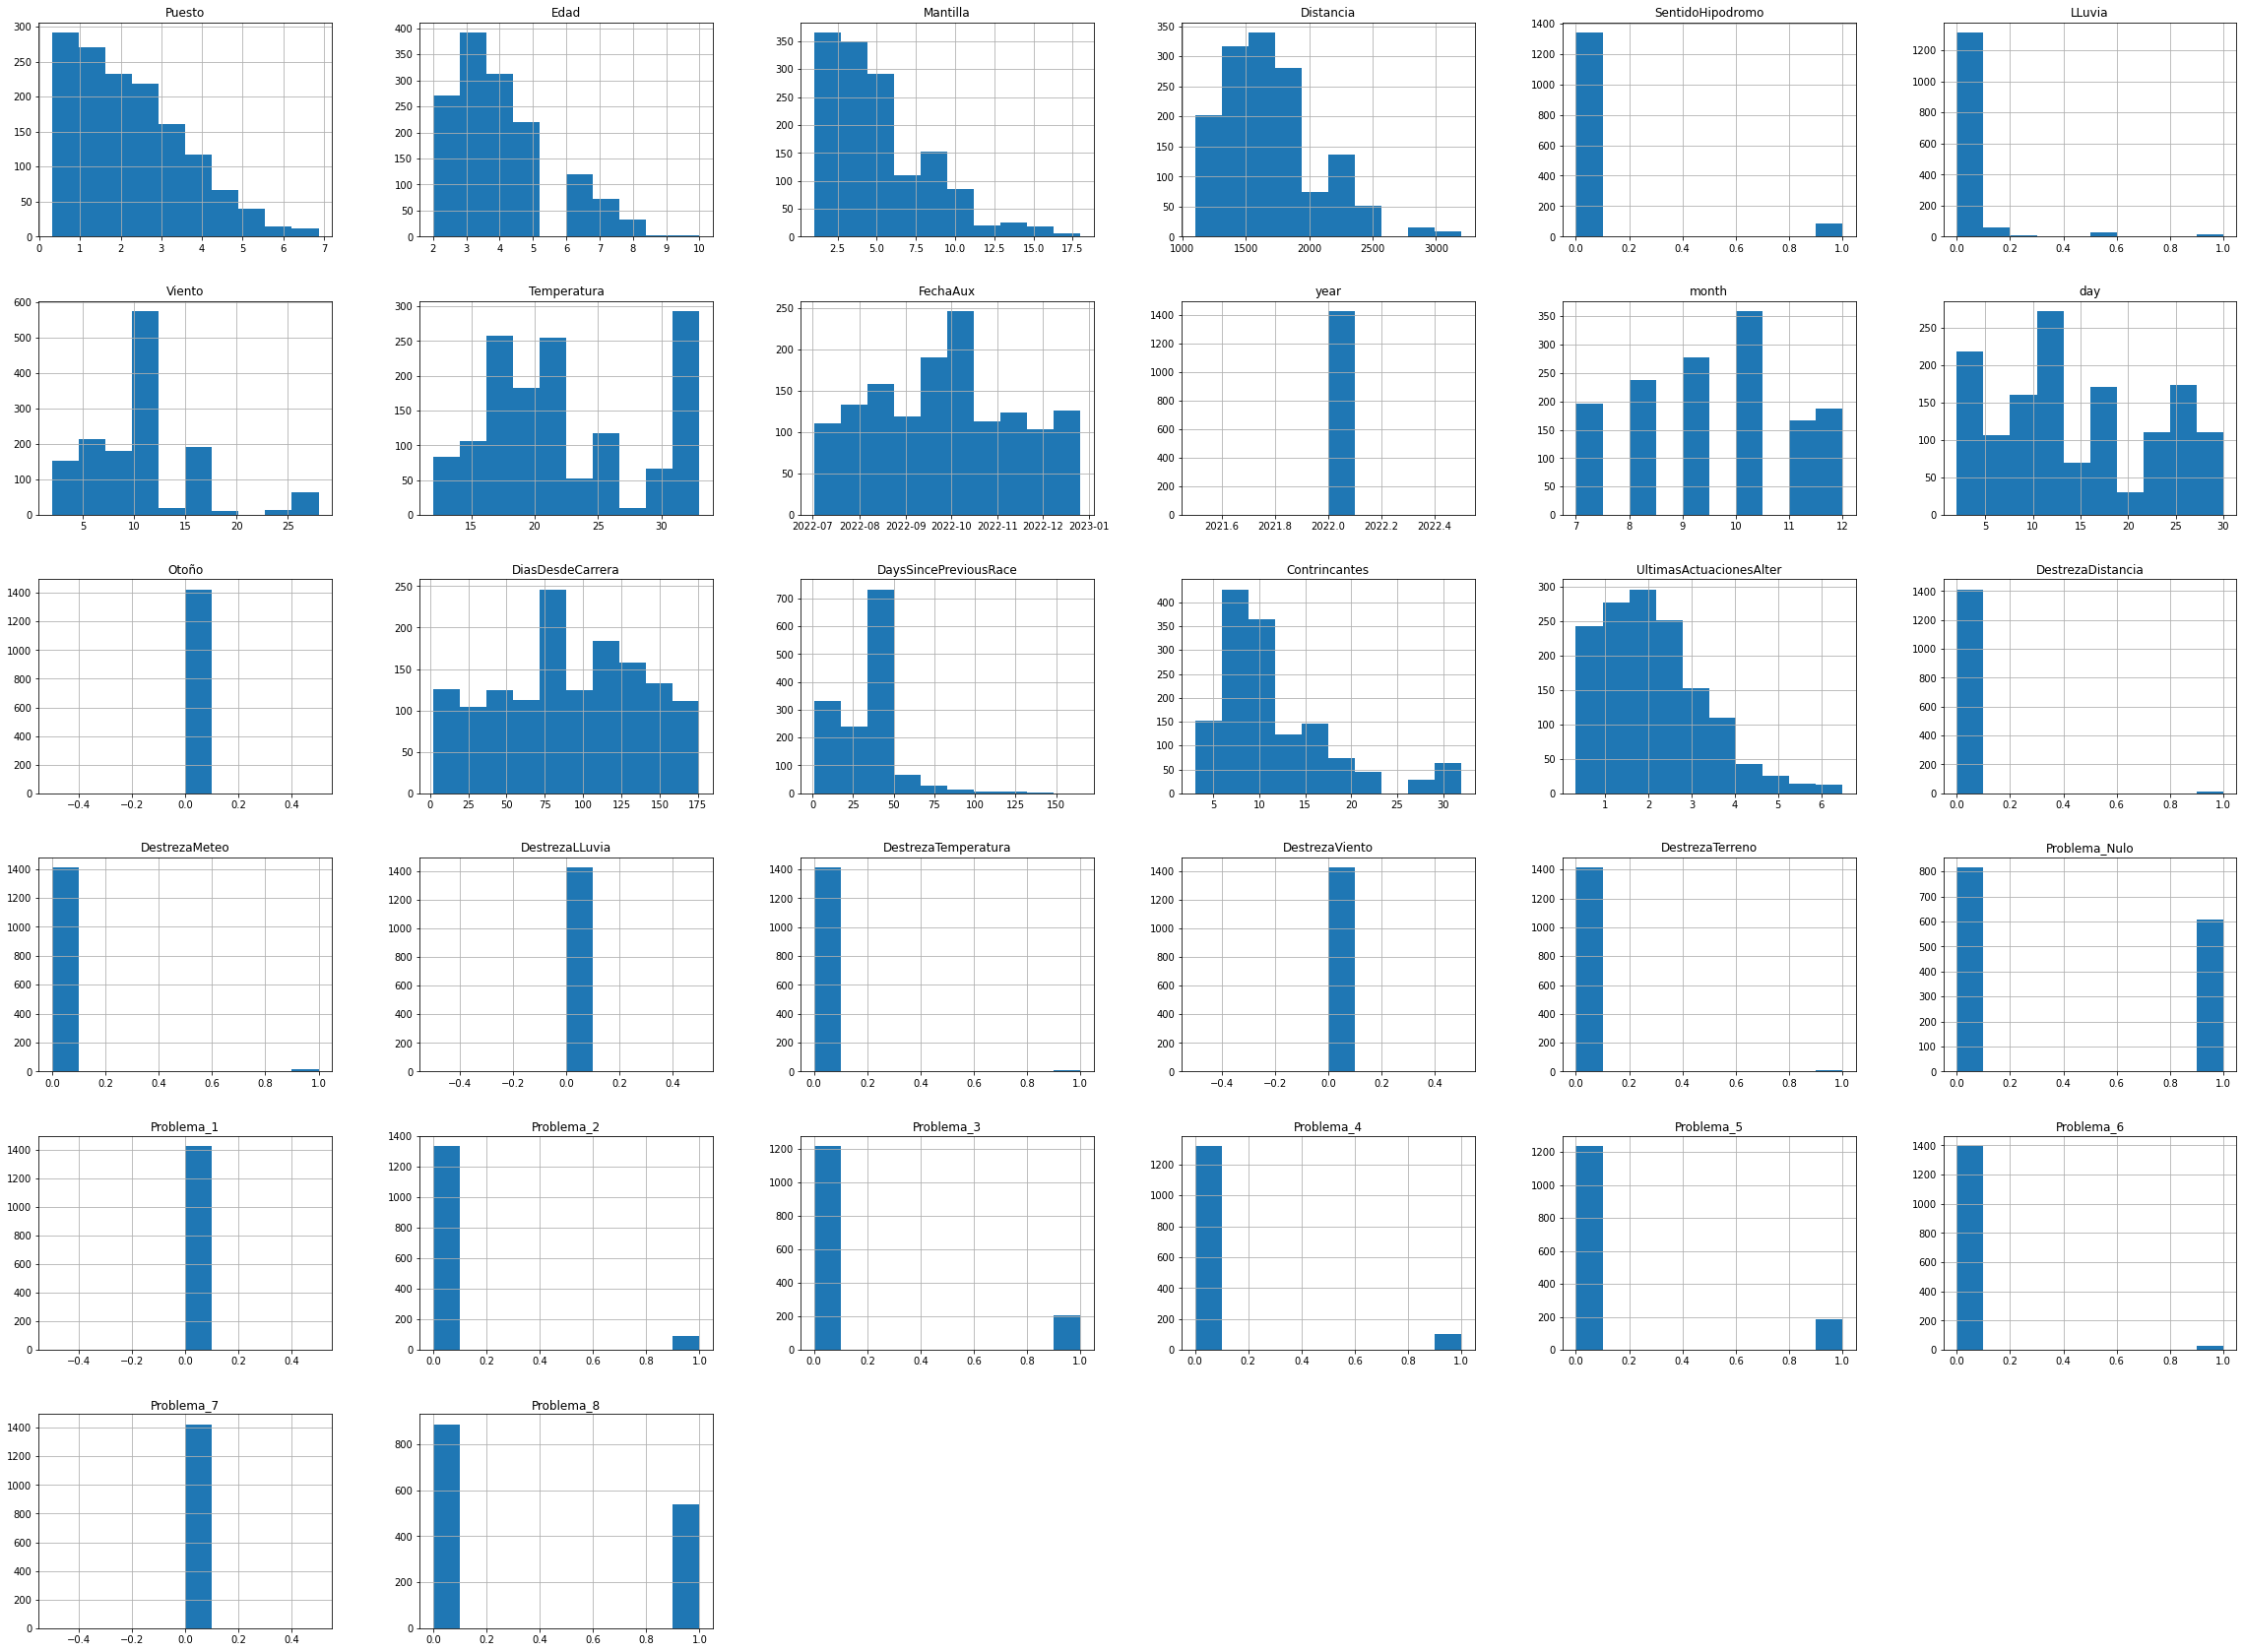

In [504]:
train.hist(figsize = (40,30))

In [505]:
# train['Puesto'].corr(train['MediaUltimasActuaciones'])

In [506]:
from scipy.stats import kendalltau, pearsonr, spearmanr
def kendall_pval(x,y):
    return kendalltau(x,y)[1]

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]


print("Correlation -->", train['Puesto'].corr(train['UltimasActuacionesAlter']))    
print(train['Puesto'].corr(train['UltimasActuacionesAlter'], method=kendall_pval))
print(train['Puesto'].corr(train['UltimasActuacionesAlter'], method=pearsonr_pval))   
print(train['Puesto'].corr(train['UltimasActuacionesAlter'], method=spearmanr_pval))

Correlation --> 0.5944356312306339
2.2440455761822012e-153
8.606686258638233e-137
1.0355572182222645e-137


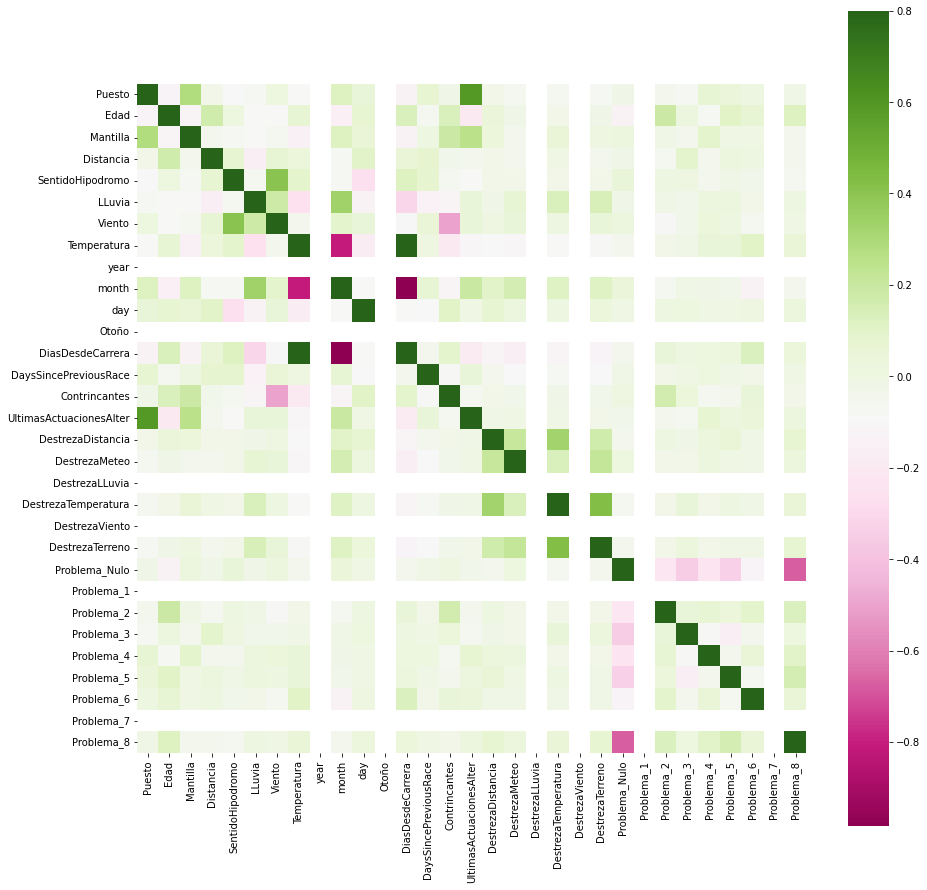

In [507]:
C_mat = train.corr()
fig = plt.figure(figsize = (15,15))

#Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. 
#The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. 
#A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.

sns.heatmap(C_mat, vmax = .8, square = True, cmap="PiYG")
plt.show()

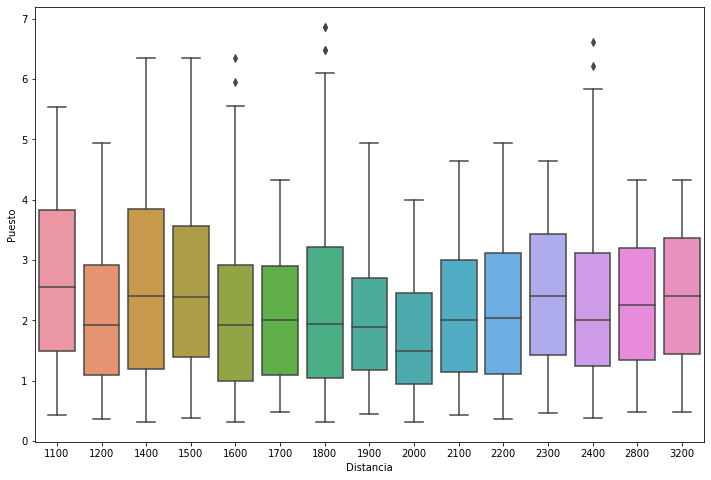

In [508]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='Distancia', y='Puesto')

plt.show()

In [509]:
print(len(train[(train['Distancia'] < 1600).tolist()]))

print(len(train[((train['Distancia'] >= 1600) & (train['Distancia'] <= 2400) ).tolist()]))

print(len(train[(train['Distancia'] >= 3200).tolist()]))

518
881
9


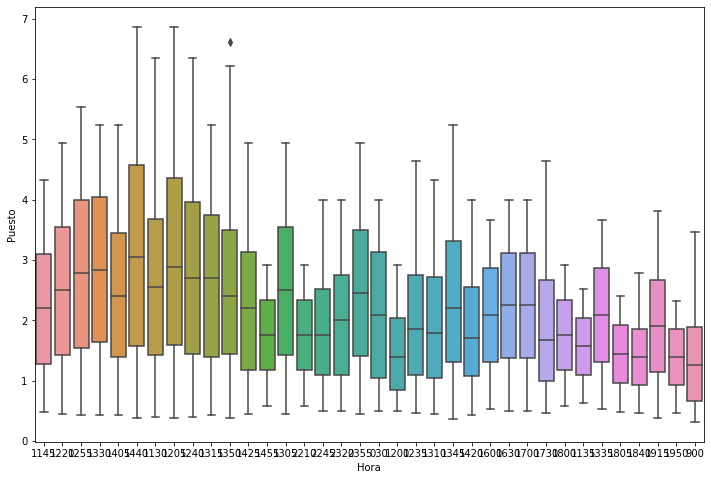

In [510]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='Hora', y='Puesto')

plt.show()

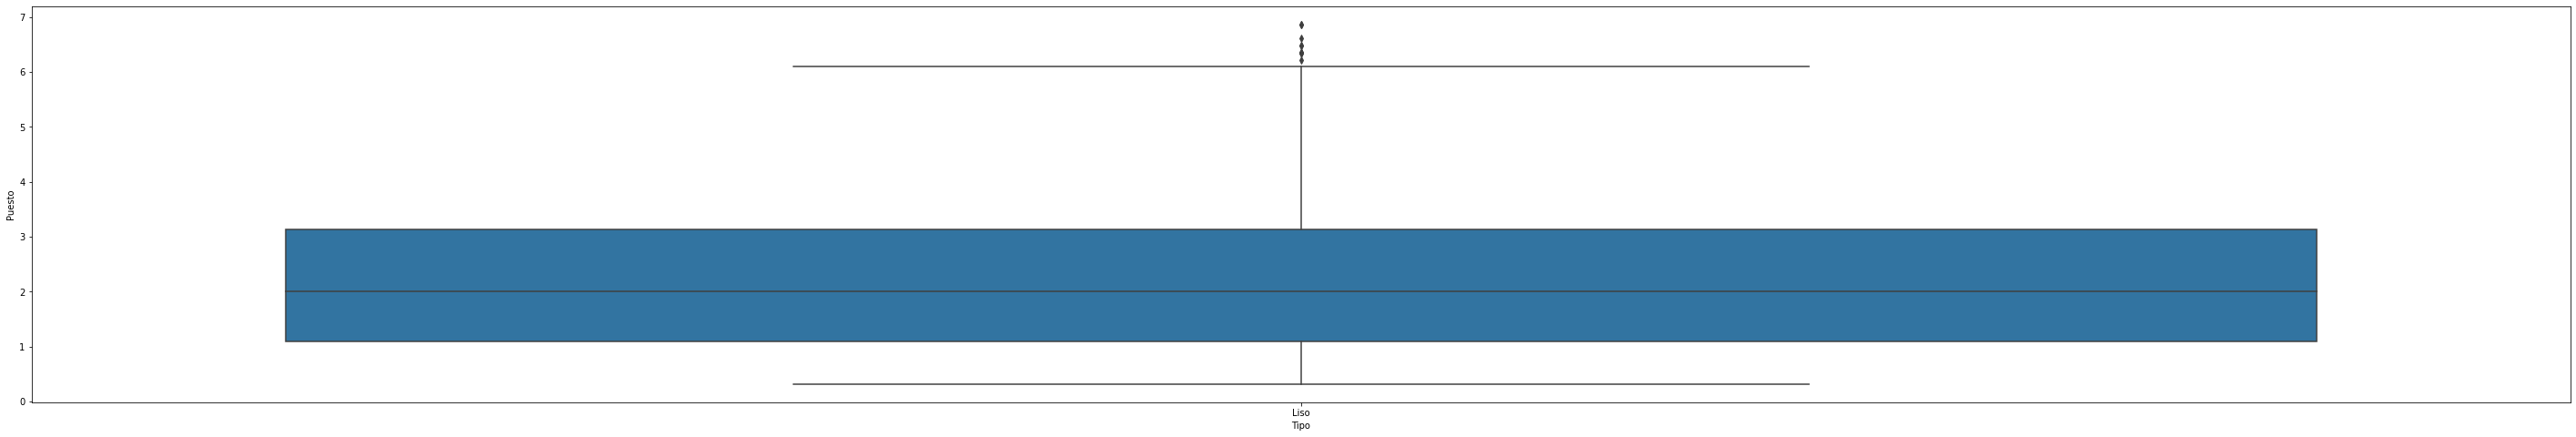

In [511]:
plt.figure(figsize=(50,8))
sns.boxplot(data=train, x='Tipo', y='Puesto')

plt.show()

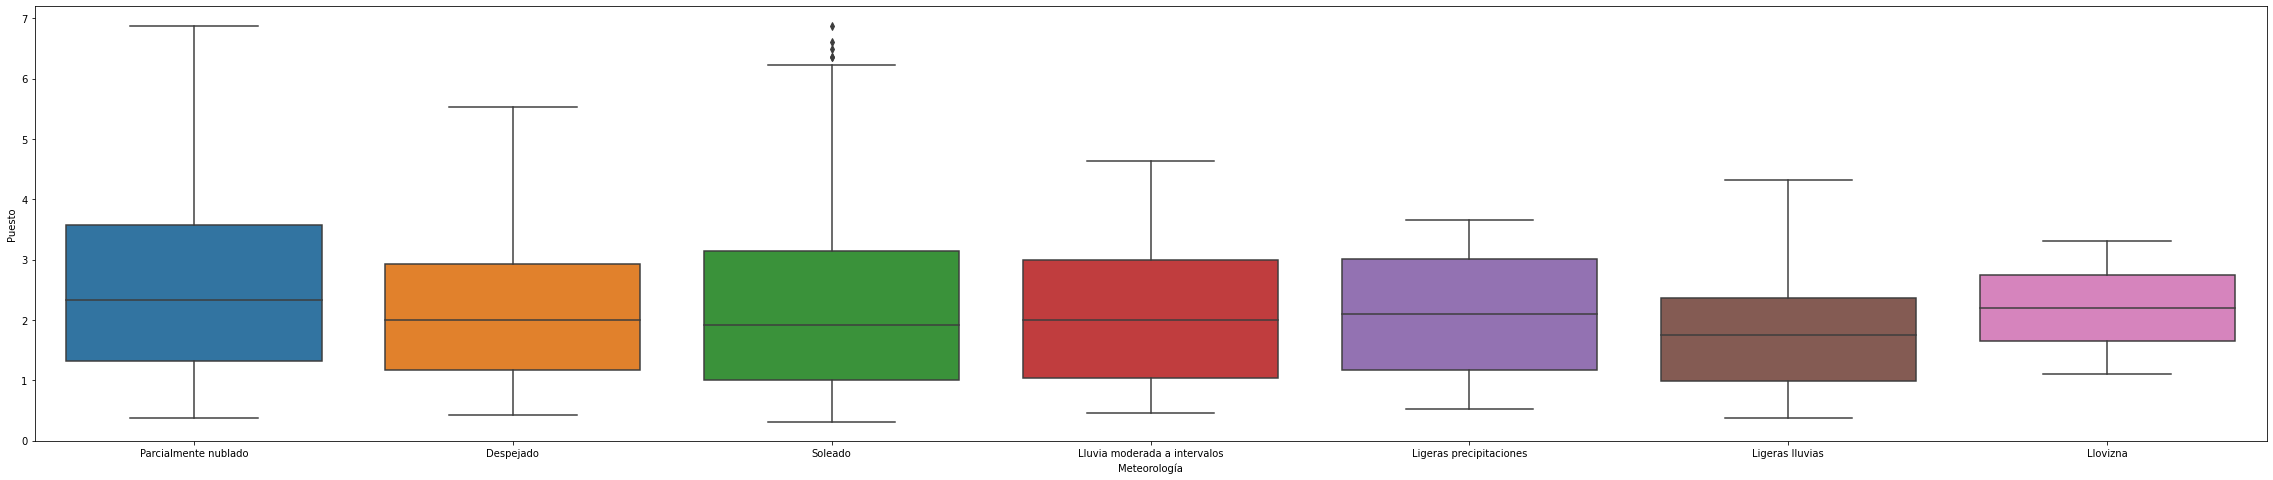

In [512]:
plt.figure(figsize=(40,8))
sns.boxplot(data=train, x='Meteorología', y='Puesto')

plt.show()

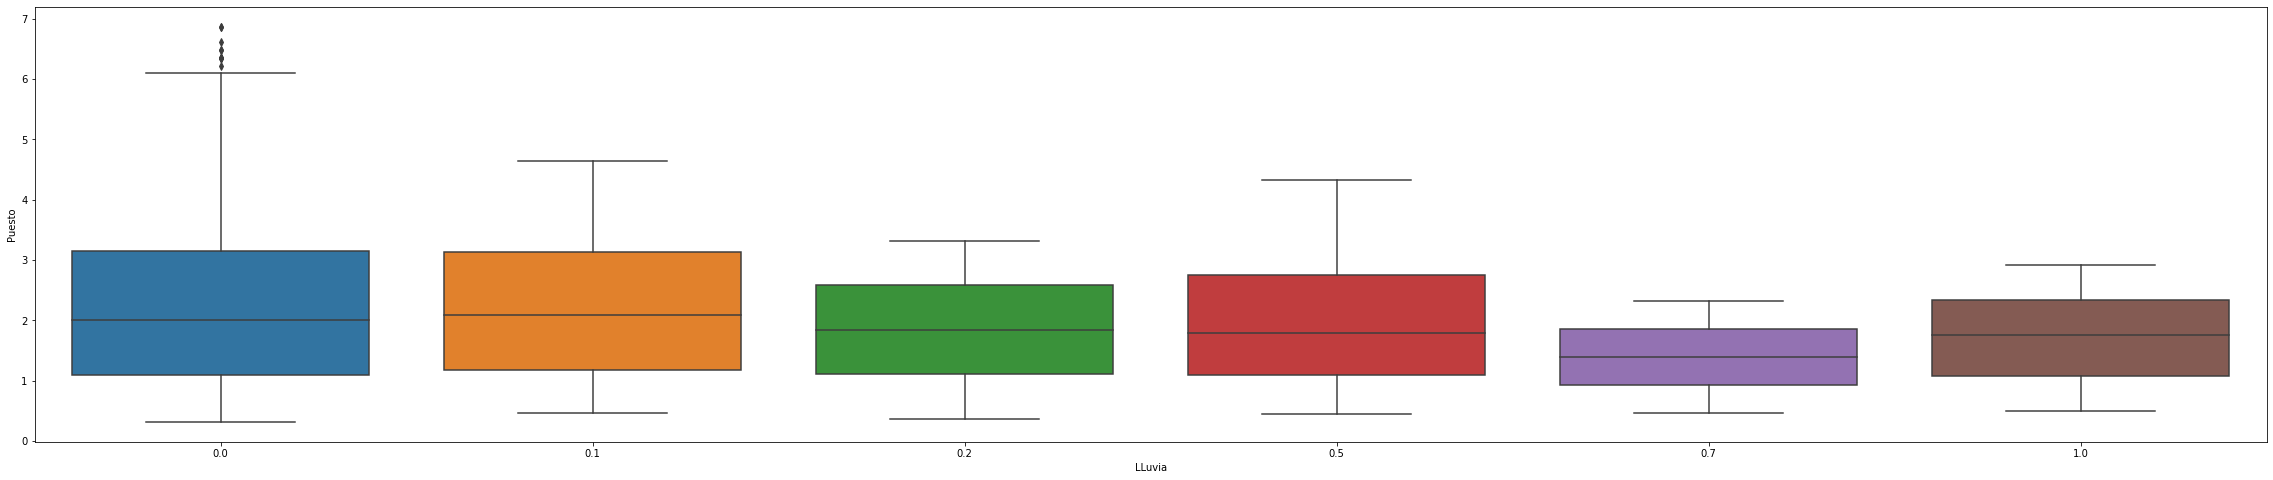

In [513]:
plt.figure(figsize=(40,8))
sns.boxplot(data=train, x='LLuvia', y='Puesto')

plt.show()

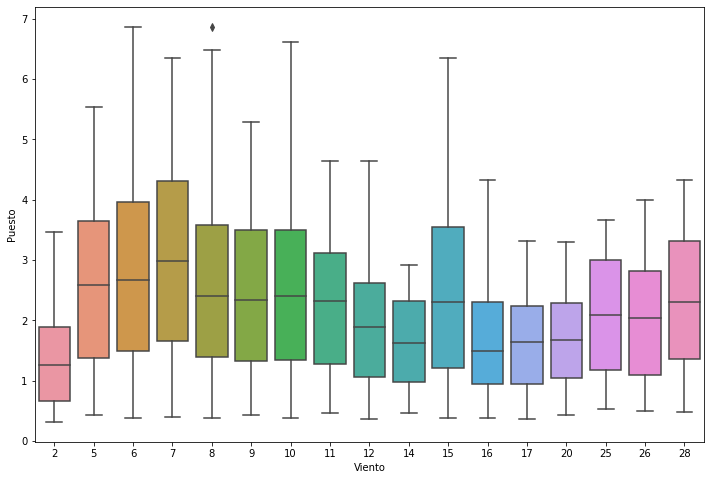

In [514]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='Viento', y='Puesto')

plt.show()

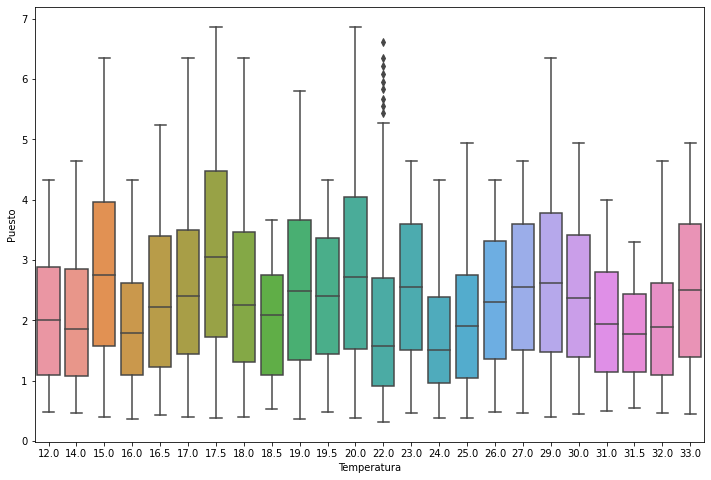

In [515]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='Temperatura', y='Puesto')

plt.show()

# Preprocesamiento Final

In [516]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Puesto                   1424 non-null   float64       
 1   NombreCaballo            1424 non-null   object        
 2   Peso                     1424 non-null   object        
 3   Edad                     1424 non-null   int64         
 4   Mantilla                 1424 non-null   int64         
 5   Propietario              1424 non-null   object        
 6   Preparador               1424 non-null   object        
 7   Jinete                   1424 non-null   object        
 8   Problemas                1424 non-null   object        
 9   Fecha                    1424 non-null   object        
 10  Hora                     1424 non-null   object        
 11  Terreno                  1424 non-null   object        
 12  Distancia                1424 non-

In [517]:
pd.set_option('display.max_columns', None)
train.head(20)

,Puesto,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,Fecha,Hora,Terreno,Distancia,Tipo,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,FechaAux,year,month,day,Otoño,DiasDesdeCarrera,DaysSincePreviousRace,Contrincantes,UltimasActuacionesAlter,DestrezaDistancia,DestrezaMeteo,DestrezaLLuvia,DestrezaTemperatura,DestrezaViento,DestrezaTerreno,Problema_Nulo,Problema_1,Problema_2,Problema_3,Problema_4,Problema_5,Problema_6,Problema_7,Problema_8
0,0.550321,OtherHorse,57,2,6,OtherOwner,OtherTrainer,OtherJockey,0,13 de noviembre de 2022,1145,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,45.0,35.0,6.0,1.358350,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0
1,1.100642,OtherHorse,57,2,5,OtherOwner,OtherTrainer,OtherJockey,0,13 de noviembre de 2022,1145,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,45.0,45.0,6.0,1.100642,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0
2,1.650964,OtherHorse,57,2,3,OtherOwner,OtherTrainer,OtherJockey,0,13 de noviembre de 2022,1145,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,45.0,14.0,6.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0
3,2.201285,OtherHorse,57,2,4,OtherOwner,OtherTrainer,B. FAYOS,-8,13 de noviembre de 2022,1145,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,45.0,35.0,6.0,4.563778,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1
4,2.751606,OtherHorse,57,2,2,REZA PAZOOKI,OtherTrainer,OtherJockey,-8,13 de noviembre de 2022,1145,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,45.0,45.0,6.0,2.751606,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1
5,3.301927,OtherHorse,57,2,1,OtherOwner,A.SOTO,OtherJockey,-3,13 de noviembre de 2022,1145,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,45.0,32.0,6.0,2.904569,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0
6,0.500000,OtherHorse,57,2,3,OtherOwner,OtherTrainer,OtherJockey,0,13 de noviembre de 2022,1220,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,45.0,32.0,8.0,1.805796,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0
7,1.000000,OtherHorse,57,2,2,OtherOwner,OtherTrainer,OtherJockey,-3,13 de noviembre de 2022,1220,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,45.0,32.0,8.0,0.873580,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0
8,1.500000,OtherHorse,57,2,9,OtherOwner,OtherTrainer,B. FAYOS,-3,13 de noviembre de 2022,1220,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,45.0,35.0,8.0,1.953625,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0
9,2.000000,OtherHorse,57,2,7,OtherOwner,OtherTrainer,OtherJockey,-8,13 de noviembre de 2022,1220,H - Blando,1500,Liso,0,Parcialmente nublado,0.0,6,15.0,La Zarzuela,2022-11-13,2022.0,11.0,13.0,0,45.0,21.0,8.0,2.574084,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1


In [518]:
import sklearn
import sklearn.compose
#Solo ejecutar previo a esto product para separar las palabras
column_transformer_train = sklearn.compose.ColumnTransformer(transformers=[
    ("drop", "drop", ['Fecha','year','day', 'Problemas','Hora', 'FechaAux', 'Mantilla', 'Terreno', 'Tipo', 'Meteorología', 'LLuvia', 'Viento', 'Temperatura', 'Hipodromo', 'Contrincantes']),
    ("scale", sklearn.preprocessing.StandardScaler(), []),
    # ("num", sklearn.preprocessing.MinMaxScaler(), ['Distancia', 'Edad', 'Peso']),
    ("one-hot", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), ['NombreCaballo','Propietario', 'Preparador', 'Jinete']),
], remainder='passthrough');

# column_transformer = sklearn.compose.ColumnTransformer(transformers=[
#     ("drop", "drop", ['UltimasActuaciones','Fecha','year','day', 'Problemas','Hora']),
#     ("scale", sklearn.preprocessing.StandardScaler(), []),
#     ("num", sklearn.preprocessing.MinMaxScaler(), ['Distancia', 'Edad', 'Peso']),
#     ("one-hot", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), ['NombreCaballo', 'Mantilla','Propietario', 'Preparador', 'Jinete', 'FechaAux', 'Terreno', 'Tipo', 'Meteorología', 'LLuvia', 'Viento', 'TemperaturaMax', 'TemperaturaMin', 'Hipodromo']),
# ], remainder='passthrough');

In [519]:
train = train.reset_index()
X=train
X_TF = X #TensorFlow
X = X.drop(["Puesto"], axis = 1)

In [520]:
X_transform = column_transformer_train.fit_transform(X)

In [521]:
column_transformer_train.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['one-hot__x0_AIFOS',
 'one-hot__x0_ALPHABETIC',
 'one-hot__x0_AS DE OROS',
 'one-hot__x0_BALLET STAR',
 "one-hot__x0_CHAM'S PRIDE",
 'one-hot__x0_CONSPIRACY',
 'one-hot__x0_DIMANCHE DE MAI',
 'one-hot__x0_DROVER',
 'one-hot__x0_GOLD BEACH',
 'one-hot__x0_HARRISON POINT',
 'one-hot__x0_INCREDIT',
 'one-hot__x0_KRYPTON',
 'one-hot__x0_MAX MAGICAL',
 'one-hot__x0_MORE LATE',
 'one-hot__x0_NA RUA',
 'one-hot__x0_NEW JACK SWING',
 'one-hot__x0_NOOZHAH SUREÑA',
 'one-hot__x0_OtherHorse',
 'one-hot__x0_PEAKY BLINDERS',
 'one-hot__x0_SANBLASS',
 'one-hot__x0_VINCERO',
 "one-hot__x0_WHAT'S UP",
 'one-hot__x1_ANAIAK',
 'one-hot__x1_DA INVICTA',
 'one-hot__x1_DIAZ RAMOS',
 'one-hot__x1_ESPECTACULO',
 'one-hot__x1_MARQUES DE MIRAFLORES',
 'one-hot__x1_MEDINA DIAZ',
 'one-hot__x1_NEO',
 'one-hot__x1_NEW BEGINNINGS',
 'one-hot__x1_NOSSA SENHORA DO VALE',
 'one-hot__x1_OtherOwner',
 'one-hot__x1_PATRIZIA ROSSANA TESTA',
 'one-hot__x1_REZA PAZOOKI',
 'one-hot__x1_RIO CUBAS',
 'one-hot__x1_SARMIENTO Y

In [522]:
train 
X_transform
X = X_transform       #Nos quedamos con todo menos la columna objetivo, en este caso 'price'
y = train["Puesto"]

In [523]:
# train[['NombreCaballo','MediaUltimasActuaciones']].head(128)

In [524]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1920)

# Optimización
---

In [525]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor

#Regresión lineal
linear = LinearRegression()
linear.fit(X_train, y_train)

#Regresión de Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

#LASSO

lasso = linear_model.Lasso()
lasso.fit(X_train, y_train)

#ElasticNet

elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train);


reg = SGDRegressor(max_iter=50, random_state=43)
reg.fit(X_train, y_train);

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [526]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

for i in range(0, 11):
  for j in range(0, 11):
    #     xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', reg_alpha=i*0.1, reg_lambda=j*0.1, verbosity=0, random_state=42, eta=0.2, tree_method="exact") 148

    elasticnet = ElasticNet(alpha=i*0.1, l1_ratio=j*0.1)
    elasticnet.fit(X_train, y_train)
    print('ElasticNet (train): ' + str(mean_absolute_error(y_train, elasticnet.predict(X_train))))
    print(f'{i} {j} ' + str(mean_absolute_error(y_test, elasticnet.predict(X_test))))

<ipython-input-526-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.037e+02, tolerance: 1.807e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-526-a43deb5d10a7>:10: U

ElasticNet (train): 0.7438377887255762
0 0 0.7902124513985028


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.037e+02, tolerance: 1.807e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-526-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages

ElasticNet (train): 0.7438377887255762
0 1 0.7902124513985028
ElasticNet (train): 0.7438377887255762
0 2 0.7902124513985028


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.037e+02, tolerance: 1.807e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-526-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)
/usr/local/lib/python3.8/dist-packages

ElasticNet (train): 0.7438377887255762
0 3 0.7902124513985028
ElasticNet (train): 0.7438377887255762
0 4 0.7902124513985028


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.037e+02, tolerance: 1.807e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-526-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages

ElasticNet (train): 0.7438377887255762
0 5 0.7902124513985028
ElasticNet (train): 0.7438377887255762

<ipython-input-526-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.037e+02, tolerance: 1.807e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-526-a43deb5d10a7>:10: U


0 6 0.7902124513985028
ElasticNet (train): 0.7438377887255762
0 7 0.7902124513985028


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.037e+02, tolerance: 1.807e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-526-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)
/usr/local/lib/python3.8/dist-packages

ElasticNet (train): 0.7438377887255762
0 8 0.7902124513985028
ElasticNet (train): 0.7438377887255762
0 9 0.7902124513985028


<ipython-input-526-a43deb5d10a7>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elasticnet.fit(X_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.037e+02, tolerance: 1.807e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


ElasticNet (train): 0.7438377887255762
0 10 0.7902124513985028
ElasticNet (train): 0.7925320894897797


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.595e+02, tolerance: 1.807e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


1 0 0.7666951390973148
ElasticNet (train): 0.8027712191745208
1 1 0.7674673102247775
ElasticNet (train): 0.8100773858662838
1 2 0.7692596624189242
ElasticNet (train): 0.8150489587282773
1 3 0.7724349061641971
ElasticNet (train): 0.8166441348066252
1 4 0.7740009703203864
ElasticNet (train): 0.8175252571437928
1 5 0.775102784616326
ElasticNet (train): 0.8184260162558026
1 6 0.776249182185454
ElasticNet (train): 0.8193488857735237
1 7 0.7774092006577019
ElasticNet (train): 0.8202922123118797
1 8 0.7785978624838122
ElasticNet (train): 0.8212659123102363
1 9 0.7798319135744777
ElasticNet (train): 0.822258380591302
1 10 0.7810863401452899


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.790e+02, tolerance: 1.807e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


ElasticNet (train): 0.8096131342796065
2 0 0.7811260075292988
ElasticNet (train): 0.8231069661482758
2 1 0.7838251611359703
ElasticNet (train): 0.8281434577103965
2 2 0.7876976678402735
ElasticNet (train): 0.8301156278378314
2 3 0.7901453344797329
ElasticNet (train): 0.8321504254734903
2 4 0.7926573942136156
ElasticNet (train): 0.8343013589258554
2 5 0.7952632810433488
ElasticNet (train): 0.8365123792875719
2 6 0.7979425981874316
ElasticNet (train): 0.8387965128621259
2 7 0.8007317689778608
ElasticNet (train): 0.8411250759351451
2 8 0.803455521616
ElasticNet (train): 0.8435083923760517
2 9 0.8062577251013732
ElasticNet (train): 0.8459673618279583
2 10 0.8091628364515072


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.944e+02, tolerance: 1.807e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


ElasticNet (train): 0.8236387405222245
3 0 0.7937374970176736
ElasticNet (train): 0.8377907689593728
3 1 0.7990504497305885
ElasticNet (train): 0.841119969518598
3 2 0.8030375793837025
ElasticNet (train): 0.8442857697842118
3 3 0.8069736084198385
ElasticNet (train): 0.8476365736625
3 4 0.8110949405288864
ElasticNet (train): 0.8512500803515355
3 5 0.815437481331236
ElasticNet (train): 0.8551931700120363
3 6 0.8199576984384228
ElasticNet (train): 0.8592268225553261
3 7 0.8243463076957146
ElasticNet (train): 0.8634536529350648
3 8 0.828914035564307
ElasticNet (train): 0.8679243574659734
3 9 0.8336759675621838
ElasticNet (train): 0.8726686510647244
3 10 0.8386759729043671


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.075e+02, tolerance: 1.807e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


ElasticNet (train): 0.8356874270938061
4 0 0.8049404144034713
ElasticNet (train): 0.8491415381763338
4 1 0.8120575511442282
ElasticNet (train): 0.8534373864811543
4 2 0.8173492305229325
ElasticNet (train): 0.8580753505180373
4 3 0.822894853369461
ElasticNet (train): 0.8632174335364755
4 4 0.8287448199331477
ElasticNet (train): 0.8687251967497626
4 5 0.834851353638143
ElasticNet (train): 0.8745090157704866
4 6 0.8409619436902829
ElasticNet (train): 0.8806709704505891
4 7 0.8473926739233782
ElasticNet (train): 0.8872115904268973
4 8 0.8545666740303672
ElasticNet (train): 0.8941211890614533
4 9 0.8621918530997521
ElasticNet (train): 0.9015431692459974
4 10 0.8704201133636594


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.190e+02, tolerance: 1.807e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


ElasticNet (train): 0.8463460889106558
5 0 0.8154658733784824
ElasticNet (train): 0.8594653326057837
5 1 0.8238786911210512
ElasticNet (train): 0.8652519031902001
5 2 0.8306219658644609
ElasticNet (train): 0.871645523996887
5 3 0.8377469155222331
ElasticNet (train): 0.8786354002066014
5 4 0.8453013235312453
ElasticNet (train): 0.8860874264635791
5 5 0.8536822743253003
ElasticNet (train): 0.8938582235973068
5 6 0.8622170248744205
ElasticNet (train): 0.9022776212790028
5 7 0.8714987949699255
ElasticNet (train): 0.9113739543278987
5 8 0.881514199632826
ElasticNet (train): 0.9214131944642181
5 9 0.8926716562800807
ElasticNet (train): 0.932510860679681
5 10 0.9049938845832375


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.291e+02, tolerance: 1.807e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


ElasticNet (train): 0.8557696915373704
6 0 0.8253211602577158
ElasticNet (train): 0.8692690559407094
6 1 0.8347627134560993
ElasticNet (train): 0.8766451388617066
6 2 0.842823202715921
ElasticNet (train): 0.8847603030342079
6 3 0.8518273946314923
ElasticNet (train): 0.8935362387947099
6 4 0.8619607861456836
ElasticNet (train): 0.9028869960158457
6 5 0.8724318376336444
ElasticNet (train): 0.9129645276722489
6 6 0.883536149254469
ElasticNet (train): 0.9241626986590564
6 7 0.8959791245829749
ElasticNet (train): 0.9367264787881148
6 8 0.9097504241411754
ElasticNet (train): 0.95070178662178
6 9 0.9249049310447555
ElasticNet (train): 0.9661819727222584
6 10 0.9416019263516684


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.382e+02, tolerance: 1.807e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


ElasticNet (train): 0.8642328791191534
7 0 0.834272968020743
ElasticNet (train): 0.8785798845757397
7 1 0.8448702130665564
ElasticNet (train): 0.8875039879981745
7 2 0.8546033528918032
ElasticNet (train): 0.8972686758557114
7 3 0.8658555705049463
ElasticNet (train): 0.9079197057372672
7 4 0.8781701282219656
ElasticNet (train): 0.9194009523824602
7 5 0.8908616901661792
ElasticNet (train): 0.9322752312195617
7 6 0.9051052830818678
ElasticNet (train): 0.9467732016909127
7 7 0.9208108842217988
ElasticNet (train): 0.963010377415163
7 8 0.9383324699286055
ElasticNet (train): 0.9811171518023483
7 9 0.9576593189008986
ElasticNet (train): 1.0016113221455862
7 10 0.9791879515994557
ElasticNet (train): 0.8720675985545225
8 0 0.8425635832880648


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.465e+02, tolerance: 1.807e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


ElasticNet (train): 0.8873942297796016
8 1 0.8544066328129358
ElasticNet (train): 0.8977546187974518
8 2 0.8660619403023603
ElasticNet (train): 0.9091501095516162
8 3 0.8792669313724841
ElasticNet (train): 0.9218532823395943
8 4 0.8938001383943169
ElasticNet (train): 0.9358586763276778
8 5 0.9091745117004579
ElasticNet (train): 0.9516985521960861
8 6 0.9262519368759362
ElasticNet (train): 0.9695387636901944
8 7 0.9454076920698452
ElasticNet (train): 0.9895895697362601
8 8 0.9667632016748605
ElasticNet (train): 1.012655534439252
8 9 0.9906647175219941
ElasticNet (train): 1.0387357249157192
8 10 1.0174313008719527


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.540e+02, tolerance: 1.807e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


ElasticNet (train): 0.8795663203241398
9 0 0.8502870162708677
ElasticNet (train): 0.8956427288792639
9 1 0.863488101386593
ElasticNet (train): 0.9073894174447437
9 2 0.8770378940492843
ElasticNet (train): 0.9206120818219552
9 3 0.8923435075394229
ElasticNet (train): 0.9355055563758493
9 4 0.9089947902637385
ElasticNet (train): 0.9520831877894826
9 5 0.9268071568011407
ElasticNet (train): 0.9708839611535128
9 6 0.9469585169186796
ElasticNet (train): 0.9921993871015184
9 7 0.969546076782691
ElasticNet (train): 1.0167776485383235
9 8 0.9949707115780307
ElasticNet (train): 1.0449068693285888
9 9 1.0236451119305396
ElasticNet (train): 1.0776397154975141
9 10 1.0565771657366754
ElasticNet (train): 0.8865056411951072
10 0 0.8574000332689103


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.608e+02, tolerance: 1.807e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


ElasticNet (train): 0.9033116927373008
10 1 0.8721020660606873
ElasticNet (train): 0.9165394302209211
10 2 0.8875369137501741
ElasticNet (train): 0.9317002736282445
10 3 0.9048694684323215
ElasticNet (train): 0.948765469309165
10 4 0.9234387403281109
ElasticNet (train): 0.967902755490352
10 5 0.9439237292184696
ElasticNet (train): 0.9896847798351293
10 6 0.9670324953147567
ElasticNet (train): 1.0149859476906917
10 7 0.9931806904212166
ElasticNet (train): 1.0440300188106797
10 8 1.022799319686863
ElasticNet (train): 1.0780351353660629
10 9 1.0569831315230394
ElasticNet (train): 1.0841347103876813
10 10 1.0628080457560467


In [527]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

for i in range(0, 11):
  for j in range(0, 11):
    #     xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', reg_alpha=i*0.1, reg_lambda=j*0.1, verbosity=0, random_state=42, eta=0.2, tree_method="exact") 148

    xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', reg_alpha=i*0.1, reg_lambda=j*0.1, verbosity=0, random_state=42, eta=0.2, tree_method="exact") #subsample ojo
    xgb_model.fit(X_train, y_train)
    print('ElasticNet (train): ' + str(mean_absolute_error(y_train, xgb_model.predict(X_train))))
    print(f'{i} {j} ' + str(mean_absolute_error(y_test, xgb_model.predict(X_test))))

ElasticNet (train): 0.5710861356897449
0 0 0.6952755401878435
ElasticNet (train): 0.574757374165216
0 1 0.6970172034991444
ElasticNet (train): 0.571203256478548
0 2 0.6931375508427983
ElasticNet (train): 0.5748555521951806
0 3 0.6933008541893393
ElasticNet (train): 0.5787488614343324
0 4 0.6943090924551754
ElasticNet (train): 0.577048891344816
0 5 0.6968777366598079
ElasticNet (train): 0.5870812137627397
0 6 0.7019470523454557
ElasticNet (train): 0.5777207279537232
0 7 0.7049936303323321
ElasticNet (train): 0.5800097451870081
0 8 0.7018026405227029
ElasticNet (train): 0.5793953939395442
0 9 0.6974363702719536
ElasticNet (train): 0.5852933077477214
0 10 0.7011801402918671
ElasticNet (train): 0.572560622888159
1 0 0.6960658768268396
ElasticNet (train): 0.5744603841311836
1 1 0.7028486824279457
ElasticNet (train): 0.5801035604887959
1 2 0.6941438363718421
ElasticNet (train): 0.5713184098959404
1 3 0.6889639902708702
ElasticNet (train): 0.5790582192738383
1 4 0.7040137252648363
ElasticNet 

In [528]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', reg_alpha=7*0.1, reg_lambda=4*0.1, verbosity=0, random_state=42, eta=0.2, tree_method="exact")

xgb_model.fit(X, y)
#print('Lineal (train): ' + str(mean_absolute_error(y_train, xgb_model.predict(X))))
#print('Lineal (test): ' + str(mean_absolute_error(y_test, xgb_model.predict(X_test))))

XGBRegressor(eta=0.2, objective='reg:squarederror', random_state=42,
             reg_alpha=0.7000000000000001, reg_lambda=0.4, tree_method='exact',
             verbosity=0)

In [529]:
!pip install catboost
import catboost as cb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [530]:
params = {"depth": 10, "learning_rate": 0.5, "iterations": 1, "l2_leaf_reg": 5} #Iterations CatBoost
model_cat_tun = cb.CatBoostClassifier(**params)
model_cat_tun.fit(X,y)

0:	learn: 5.2866735	total: 8.25s	remaining: 13m 37s
1:	learn: 5.1753787	total: 19.7s	remaining: 16m 3s
2:	learn: 5.0631603	total: 30.5s	remaining: 16m 27s
3:	learn: 4.9536693	total: 36.6s	remaining: 14m 38s
4:	learn: 4.8378332	total: 42.6s	remaining: 13m 28s
5:	learn: 4.7184605	total: 48.6s	remaining: 12m 40s
6:	learn: 4.6023001	total: 54.7s	remaining: 12m 6s
7:	learn: 4.4831968	total: 1m 1s	remaining: 11m 42s
8:	learn: 4.3640587	total: 1m 7s	remaining: 11m 18s
9:	learn: 4.2419860	total: 1m 13s	remaining: 10m 58s
10:	learn: 4.1367103	total: 1m 19s	remaining: 10m 42s
11:	learn: 4.0386320	total: 1m 25s	remaining: 10m 27s
12:	learn: 3.9334388	total: 1m 31s	remaining: 10m 13s
13:	learn: 3.8327451	total: 1m 37s	remaining: 9m 59s
14:	learn: 3.7259441	total: 1m 43s	remaining: 9m 48s
15:	learn: 3.6314685	total: 1m 50s	remaining: 9m 37s
16:	learn: 3.5340455	total: 1m 56s	remaining: 9m 26s
17:	learn: 3.4454712	total: 2m 2s	remaining: 9m 17s
18:	learn: 3.3560243	total: 2m 9s	remaining: 9m 10s
19:

In [531]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor


# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 2000, random_state = 42)
# Train the model on training data
rf.fit(X, y);

In [532]:

from sklearn.tree import DecisionTreeRegressor

# Build decision tree
tree=DecisionTreeRegressor(max_depth=20)
tree.fit(X, y);

In [533]:
from sklearn.metrics import mean_absolute_error


print('RandomForest (train): ' + str(mean_absolute_error(y_train,  rf.predict(X_train))))
print('RandomForest (test): ' + str(mean_absolute_error(y_test,  rf.predict(X_test))))


print('---')


print('XGB (train): ' + str(mean_absolute_error(y_train, xgb_model.predict(X_train))))
print('XGB (test): ' + str(mean_absolute_error(y_test, xgb_model.predict(X_test))))



print('---')

print('Cat (train): ' + str(mean_absolute_error(y_train, model_cat_tun.predict(X_train))))
print('Cat (test): ' + str(mean_absolute_error(y_test, model_cat_tun.predict(X_test))))



print('---')

print('Lineal (train): ' + str(mean_absolute_error(y_train, linear.predict(X_train))))
print('Lineal (test): ' + str(mean_absolute_error(y_test, linear.predict(X_test))))

print('---')

print('Ridge (train): ' + str(mean_absolute_error(y_train, ridge.predict(X_train))))
print('Ridge (test): ' + str(mean_absolute_error(y_test, ridge.predict(X_test))))

print('---')

print('LASSO (train): ' + str(mean_absolute_error(y_train, lasso.predict(X_train))))
print('LASSO (test): ' + str(mean_absolute_error(y_test, lasso.predict(X_test))))

print('---')

print('ElasticNet (train): ' + str(mean_absolute_error(y_train, elasticnet.predict(X_train))))
print('ElasticNet (test): ' + str(mean_absolute_error(y_test, elasticnet.predict(X_test))))

print('---')

print('SGD (train): ' + str(mean_absolute_error(y_train, reg.predict(X_train))))
print('SGD (test): ' + str(mean_absolute_error(y_test, reg.predict(X_test))))

RandomForest (train): 0.25959046379816453
RandomForest (test): 0.24954918043586863
---
XGB (train): 0.6073440089990735
XGB (test): 0.5777329482120195
---
Cat (train): 4.487319113249012e-08
Cat (test): 4.2836429586683006e-08
---
Lineal (train): 0.7438377887256836
Lineal (test): 0.7902124513983042
---
Ridge (train): 0.7503805275600748
Ridge (test): 0.7722754071233194
---
LASSO (train): 1.0841347103876813
LASSO (test): 1.0628080457560467
---
ElasticNet (train): 1.0841347103876813
ElasticNet (test): 1.0628080457560467
---
SGD (train): 600281798841227.6
SGD (test): 604280196888490.8


In [534]:
from sklearn.metrics import accuracy_score

print('Lineal (train): ' + str(linear.score(X_train, y_train)))
print('Lineal (test): ' + str(linear.score(X_test, y_test)))
print('---')
print('Ridge (train): ' + str(ridge.score(X_train, y_train)))
print('Ridge (test): ' + str(ridge.score(X_test, y_test)))
print('---')
print('LASSO (train): ' + str(lasso.score(X_train, y_train)))
print('LASSO (test): ' + str(lasso.score(X_test, y_test)))
print('---')
print('ElasticNet (train): ' + str(elasticnet.score(X_train, y_train)))
print('ElasticNet (test): ' + str(elasticnet.score(X_test, y_test)))

Lineal (train): 0.44256753004232685
Lineal (test): 0.3768165853956472
---
Ridge (train): 0.43921518538553417
Ridge (test): 0.40240514229103674
---
LASSO (train): 0.0809075755261921
LASSO (test): 0.0989516516167247
---
ElasticNet (train): 0.0809075755261921
ElasticNet (test): 0.0989516516167247


In [535]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print('Lineal (train): ' + str(sqrt(mean_squared_error(y_train, linear.predict(X_train)))))
print('Lineal (test): ' + str(sqrt(mean_squared_error(y_test, linear.predict(X_test)))))
print('---')
print('Ridge (train): ' + str(sqrt(mean_squared_error(y_train, ridge.predict(X_train)))))
print('Ridge (test): ' + str(sqrt(mean_squared_error(y_test, ridge.predict(X_test)))))
print('---')
print('LASSO (train): ' + str(sqrt(mean_squared_error(y_train, lasso.predict(X_train)))))
print('LASSO (test): ' + str(sqrt(mean_squared_error(y_test, lasso.predict(X_test)))))
print('---')
print('ElasticNet (train): ' + str(sqrt(mean_squared_error(y_train, elasticnet.predict(X_train)))))
print('ElasticNet (test): ' + str(sqrt(mean_squared_error(y_test, elasticnet.predict(X_test)))))

Lineal (train): 1.0276558128249862
Lineal (test): 1.0807489339772953
---
Ridge (train): 1.0307412918886247
Ridge (test): 1.0583280295010662
---
LASSO (train): 1.3195660857033833
LASSO (test): 1.2995437953392137
---
ElasticNet (train): 1.3195660857033833
ElasticNet (test): 1.2995437953392137


Linear
---

In [536]:
from sklearn.model_selection import GridSearchCV

In [537]:
fit_intercept = [True, False]
copy_x = [True, False]
normalize = [True, False]

In [538]:
linear_Grid = GridSearchCV(
  estimator = LinearRegression(),
  param_grid = dict(fit_intercept = fit_intercept, copy_X = copy_x, normalize = normalize),
  cv = 5
)
linear_Grid.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [539]:
linear_Grid.best_estimator_

LinearRegression(normalize=False)

In [540]:
linear_Grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [541]:
linear_Grid.best_score_

0.24243667768804356

In [542]:
linear = LinearRegression(fit_intercept=True, normalize=False, copy_X=True)
linear.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(normalize=False)

In [543]:
print("MAE: ")
print('Train: ' + str(mean_absolute_error(y_train, linear.predict(X_train))))
print('Test: ' + str(mean_absolute_error(y_test, linear.predict(X_test))))
print("---------------------------------------")
print("R^2: ")
print("Train: " + str(linear.score(X_train, y_train)))
print("Test: " + str(linear.score(X_test, y_test)))
print("---------------------------------------")
print("RMST: ")
print('Train: ' + str(sqrt(mean_squared_error(y_train, linear.predict(X_train)))))
print('Test: ' + str(sqrt(mean_squared_error(y_train, linear.predict(X_train)))))

MAE: 
Train: 0.7438377887256836
Test: 0.7902124513983042
---------------------------------------
R^2: 
Train: 0.44256753004232685
Test: 0.3768165853956472
---------------------------------------
RMST: 
Train: 1.0276558128249862
Test: 1.0276558128249862


Se puede observar que no mejora ya que los parámetros que nos da el GridSearch son los mismos que tiene de base.

Ridge
---

In [544]:
ridge_Grid = GridSearchCV(
  estimator = Ridge(),
  param_grid = dict(alpha= np.linspace(0, 1, 50), copy_X = copy_x, fit_intercept=fit_intercept, normalize = normalize),
  cv = 5

)
ridge_Grid.fit(X, y)

Se han truncado las últimas 5000 líneas del flujo de salida.
Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ]),
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [545]:
ridge_Grid.best_estimator_

Ridge(alpha=0.26530612244897955, normalize=True)

In [546]:
ridge_Grid.best_params_

{'alpha': 0.26530612244897955,
 'copy_X': True,
 'fit_intercept': True,
 'normalize': True}

In [547]:
ridge_Grid.best_score_

0.29024627883710086

In [548]:
ridge = Ridge(alpha=0.32653061224489793, copy_X=True, fit_intercept=True,
      normalize=True, random_state=1337, solver='auto', tol=0.001)
ridge.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0.32653061224489793, normalize=True, random_state=1337)

In [549]:
print("MAE: ")
print('Train: ' + str(mean_absolute_error(y_train, ridge.predict(X_train))))
print('Test: ' + str(mean_absolute_error(y_test, ridge.predict(X_test))))
print("---------------------------------------")
print("R^2: ")
print("Train: " + str(ridge.score(X_train, y_train)))
print("Test: " + str(ridge.score(X_test, y_test)))
print("---------------------------------------")
print("RMST: ")
print('Train: ' + str(sqrt(mean_squared_error(y_train, ridge.predict(X_train)))))
print('Test: ' + str(sqrt(mean_squared_error(y_test, ridge.predict(X_test)))))

MAE: 
Train: 0.8026004166241553
Test: 0.8344078296515195
---------------------------------------
R^2: 
Train: 0.4130583764988004
Test: 0.36455908984316265
---------------------------------------
RMST: 
Train: 1.054505881663879
Test: 1.0913258902190242


Parece que empeora ligeramente con respecto a los valores por defecto que tenía antes.

LASSO
---

In [550]:
lasso_Grid = GridSearchCV(estimator = linear_model.Lasso(), param_grid = dict(alpha= np.linspace(0.05,1,20)), cv = 5)
lasso_Grid.fit(X, y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])})

In [551]:
lasso_Grid.best_params_

{'alpha': 0.05}

In [552]:
lasso = linear_model.Lasso(alpha=1, random_state=1337)
lasso.fit(X_train, y_train)

Lasso(alpha=1, random_state=1337)

In [553]:
print("MAE: ")
print('Train: ' + str(mean_absolute_error(y_train, lasso.predict(X_train))))
print('Test: ' + str(mean_absolute_error(y_test, lasso.predict(X_test))))
print("---------------------------------------")
print("R^2: ")
print("Train: " + str(lasso.score(X_train, y_train)))
print("Test: " + str(lasso.score(X_test, y_test)))
print("---------------------------------------")
print("RMST: ")
print('Train: ' + str(sqrt(mean_squared_error(y_train, lasso.predict(X_train)))))
print('Test: ' + str(sqrt(mean_squared_error(y_train, lasso.predict(X_train)))))

MAE: 
Train: 1.0841347103876813
Test: 1.0628080457560467
---------------------------------------
R^2: 
Train: 0.0809075755261921
Test: 0.0989516516167247
---------------------------------------
RMST: 
Train: 1.3195660857033833
Test: 1.3195660857033833


Se queda igual que con los valores de base.

ElasticNet
---

Este regresor a veces funciona y a veces explota, dejamos guardado los resultados de cuando ha funcionado. De todos modos nos sale el siguiente error:<br>


```
# /usr/local/lib/python3.6/dist-packages/sklearn linear_model_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge.
```



In [554]:
elastic_Grid = GridSearchCV(
  estimator = ElasticNet(),
  param_grid = dict(alpha=np.linspace(0.1,1,2), l1_ratio=np.linspace(0,1,2)),
  cv = 5
)
elastic_Grid.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.491e+02, tolerance: 2.011e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.602e+02, tolerance: 1.825e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([0.1, 1. ]),
                         'l1_ratio': array([0., 1.])})

In [555]:
elastic_Grid.best_params_

{'alpha': 0.1, 'l1_ratio': 0.0}

In [556]:
elasticnet = ElasticNet(alpha = 1.0, l1_ratio = 1, fit_intercept=True, normalize=False, copy_X=True)
elasticnet.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


ElasticNet(l1_ratio=1, normalize=False)

In [557]:
print("MAE: ")
print('Train: ' + str(mean_absolute_error(y_train, elasticnet.predict(X_train))))
print('Test: ' + str(mean_absolute_error(y_test, elasticnet.predict(X_test))))
print("---------------------------------------")
print("R^2: ")
print("Train: " + str(lasso.score(X_train, y_train)))
print("Test: " + str(lasso.score(X_test, y_test)))
print("---------------------------------------")
print("RMST: ")
print('Train: ' + str(sqrt(mean_squared_error(y_train, elasticnet.predict(X_train)))))
print('Test: ' + str(sqrt(mean_squared_error(y_train, elasticnet.predict(X_train)))))

MAE: 
Train: 1.0841347103876813
Test: 1.0628080457560467
---------------------------------------
R^2: 
Train: 0.0809075755261921
Test: 0.0989516516167247
---------------------------------------
RMST: 
Train: 1.3195660857033833
Test: 1.3195660857033833


# Validación Cruzada
---

## Linear

MAE

In [558]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

In [559]:
cv_scores_linearMAE = cross_val_score(
                estimator = linear,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_absolute_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_linearMAE}")
print(f"Média métricas de validación cruzada: {cv_scores_linearMAE.mean()}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


Métricas validación cruzada: [-1.11775138 -0.99217054 -0.81297399 -0.74493892 -0.52865084]
Média métricas de validación cruzada: -0.8392971333723775


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

R^2

In [560]:
cv_scores_linearR = cross_val_score(
                estimator = linear,
                X         = X,
                y         = y,
                scoring   = 'r2',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_linearR}")
print(f"Média métricas de validación cruzada: {cv_scores_linearR.mean()}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

Métricas validación cruzada: [ 0.08890496  0.30631046  0.35979626 -0.07356415  0.53073585]
Média métricas de validación cruzada: 0.24243667768804356


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


RMSE

In [561]:
cv_scores_linearRMSE = cross_val_score(
                estimator = linear,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_squared_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_linearRMSE}")
print(f"Média métricas de validación cruzada: {cv_scores_linearRMSE.mean()}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

Métricas validación cruzada: [-2.00427109 -1.83797208 -1.06212618 -1.10355258 -0.47208132]
Média métricas de validación cruzada: -1.2960006491584308


## Ridge
---

MAE

In [562]:
cv_scores_ridgeMAE = cross_val_score(
                estimator = ridge,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_absolute_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_ridgeMAE}")
print(f"Média métricas de validación cruzada: {cv_scores_ridgeMAE.mean()}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

Métricas validación cruzada: [-1.07300559 -1.08399621 -0.86246906 -0.71309453 -0.56150995]
Média métricas de validación cruzada: -0.8588150693539539


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


R^2

In [563]:
cv_scores_ridgeR = cross_val_score(
                estimator = ridge,
                X         = X,
                y         = y,
                scoring   = 'r2',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_ridgeR}")
print(f"Média métricas de validación cruzada: {cv_scores_ridgeR.mean()}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

Métricas validación cruzada: [0.16903956 0.25605329 0.33715797 0.17489093 0.51054371]
Média métricas de validación cruzada: 0.2895370936326892


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


RMSE

In [564]:
cv_scores_ridgeRMSE = cross_val_score(
                estimator = ridge,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_squared_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_ridgeRMSE}")
print(f"Média métricas de validación cruzada: {cv_scores_ridgeRMSE.mean()}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

Métricas validación cruzada: [-1.82798712 -1.97113146 -1.09968409 -0.84815727 -0.49239468]
Média métricas de validación cruzada: -1.2478709252248643


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


## LASSO
---

MAE

In [565]:
cv_scores_lassoMAE = cross_val_score(
                estimator = lasso,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_absolute_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_lassoMAE}")
print(f"Média métricas de validación cruzada: {cv_scores_lassoMAE.mean()}")

Métricas validación cruzada: [-1.28306873 -1.37182853 -1.05616739 -0.90558908 -0.85601931]
Média métricas de validación cruzada: -1.0945346089549415


R^2

In [566]:
cv_scores_lassoR = cross_val_score(
                estimator = lasso,
                X         = X,
                y         = y,
                scoring   = 'r2',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_lassoR}")
print(f"Média métricas de validación cruzada: {cv_scores_lassoR.mean()}")

Métricas validación cruzada: [-0.05632104 -0.06148085  0.02626301 -0.11969563 -0.10383542]
Média métricas de validación cruzada: -0.06301398573183012


RMSE

In [567]:
cv_scores_lassoRMSE = cross_val_score(
                estimator = lasso,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_squared_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_lassoRMSE}")
print(f"Média métricas de validación cruzada: {cv_scores_lassoRMSE.mean()}")

Métricas validación cruzada: [-2.3237463  -2.81245723 -1.61547251 -1.15097267 -1.11046217]
Média métricas de validación cruzada: -1.8026221784532654


## ElasticNet
---

MAE

In [568]:
cv_scores_netMAE = cross_val_score(
                estimator = elasticnet,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_absolute_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_netMAE}")
print(f"Média métricas de validación cruzada: {cv_scores_netMAE.mean()}")

Métricas validación cruzada: [-1.28306873 -1.37182853 -1.05616739 -0.90558908 -0.85601931]
Média métricas de validación cruzada: -1.0945346089549415


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

R^2

In [569]:
cv_scores_netR = cross_val_score(
                estimator = elasticnet,
                X         = X,
                y         = y,
                scoring   = 'r2',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_netR}")
print(f"Média métricas de validación cruzada: {cv_scores_netR.mean()}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


Métricas validación cruzada: [-0.05632104 -0.06148085  0.02626301 -0.11969563 -0.10383542]
Média métricas de validación cruzada: -0.06301398573183012


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

RMSE

In [570]:
cv_scores_netRMSE = cross_val_score(
                estimator = elasticnet,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_squared_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_netRMSE}")
print(f"Média métricas de validación cruzada: {cv_scores_netRMSE.mean()}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


Métricas validación cruzada: [-2.3237463  -2.81245723 -1.61547251 -1.15097267 -1.11046217]
Média métricas de validación cruzada: -1.8026221784532654


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

## XGBoost
---

MAE

In [571]:
cv_scores_netMAE = cross_val_score(
                estimator = xgb_model,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_absolute_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_netMAE}")
print(f"Média métricas de validación cruzada: {cv_scores_netMAE.mean()}")

Métricas validación cruzada: [-1.24441746 -0.94779927 -0.70160559 -0.5693537  -0.52834445]
Média métricas de validación cruzada: -0.7983040955069128


R^2

In [572]:
cv_scores_netR = cross_val_score(
                estimator = xgb_model,
                X         = X,
                y         = y,
                scoring   = 'r2',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_netR}")
print(f"Média métricas de validación cruzada: {cv_scores_netR.mean()}")

Métricas validación cruzada: [-0.03153403  0.36548066  0.41861897  0.30393328  0.54237688]
Média métricas de validación cruzada: 0.31977515220896424


RMSE

In [573]:
cv_scores_netRMSE = cross_val_score(
                estimator = xgb_model,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_squared_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_netRMSE}")
print(f"Média métricas de validación cruzada: {cv_scores_netRMSE.mean()}")

Métricas validación cruzada: [-2.26921864 -1.68119709 -0.96453671 -0.71551031 -0.46037041]
Média métricas de validación cruzada: -1.2181666322381095


## TreeRegressor
---

MAE

In [574]:
cv_scores_trMAE = cross_val_score(
                estimator = rf,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_absolute_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_trMAE}")
print(f"Média métricas de validación cruzada: {cv_scores_trMAE.mean()}")

Métricas validación cruzada: [-1.35250304 -0.91794768 -0.66548968 -0.55844014 -0.50120461]
Média métricas de validación cruzada: -0.7991170314587606


R^2

In [575]:
cv_scores_trR = cross_val_score(
                estimator = rf,
                X         = X,
                y         = y,
                scoring   = 'r2',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_netR}")
print(f"Média métricas de validación cruzada: {cv_scores_netR.mean()}")

Métricas validación cruzada: [-0.03153403  0.36548066  0.41861897  0.30393328  0.54237688]
Média métricas de validación cruzada: 0.31977515220896424


RMSE

In [576]:
cv_scores_trRMSE = cross_val_score(
                estimator = rf,
                X         = X,
                y         = y,
                scoring   = 'neg_mean_squared_error',
                cv        = 5
             )
print(f"Métricas validación cruzada: {cv_scores_trRMSE}")
print(f"Média métricas de validación cruzada: {cv_scores_trRMSE.mean()}")

Métricas validación cruzada: [-2.77439616 -1.72408951 -0.95409693 -0.70776772 -0.42174882]
Média métricas de validación cruzada: -1.3164198293875917


# Prueba
---

In [577]:
train = test
train['NombreCaballo'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

TELEMACHUS            1
INCREDIT              1
AIFOS                 1
VINCERO               1
KRYPTON               1
SOPHIE'S WATCH        1
MORE LATE             1
NOOZHAH SUREÑA        1
LOVE FIFTEEN          1
REBELLIOUS SPIRIT     1
MAX MAGICAL           1
NEW JACK SWING        1
WHAT'S UP             1
FAR AWAY THOUGHTS     1
GIRON                 1
CONSPIRACY            1
DROVER                1
BALLET STAR           1
DIMANCHE DE MAI       1
GOLD BEACH            1
AS DE OROS            1
NA RUA                1
ALPHABETIC            1
SANBLASS              1
HARRISON POINT        1
PEAKY BLINDERS        1
CHAM'S PRIDE          1
Name: NombreCaballo, dtype: int64

# Ajuste Preprocesamiento
- Borrar Puesto
- Ajuste Listas Apariciones

In [578]:
train = train.drop('DistanciaMeta', axis=1)
train = train.drop('Dividendo', axis=1)

In [579]:
train['NombreCaballo'] = train['NombreCaballo'].str.partition('(')[0]
print(listAparicionesHorse)
listTestHorse= eraseBlank(listaNombreCaballo)



train['Propietario'] = train['Propietario'].str.strip()
train['NombreCaballo'] = train['NombreCaballo'].str.strip()
train['Jinete'] = train['Jinete'].str.strip()
train['Preparador'] = train['Preparador'].str.strip()

train.loc[~train["Propietario"].isin(listAparicionesOwner), "Propietario"] = "OtherOwner"
# train.loc[~train["NombreCaballo"].isin(listAparicionesHorse), "NombreCaballo"] = "OtherHorse" #Lo hacemos mas tarde
train.loc[~train["Jinete"].isin(listAparicionesJockey), "Jinete"] = "OtherJockey"
train.loc[~train["Preparador"].isin(listAparicionesTrainer), "Preparador"] = "OtherTrainer"

# if 'OtherOwner' not in train:
#   train['OtherOwner'] = 0

# if 'OtherHorse' not in train:
#   train['OtherHorse'] = 0

if 'OtherJockey' not in train:
  train['OtherJockey'] = 0

# if 'OtherTrainer' not in train:
#   train['OtherTrainer'] = 0


['DROVER', 'NOOZHAH SUREÑA', 'INCREDIT', 'NEW JACK SWING', "WHAT'S UP", 'SANBLASS', 'MORE LATE', 'VINCERO', 'CONSPIRACY', 'PEAKY BLINDERS', 'BALLET STAR', 'INCREDIT', 'VINCERO', 'AIFOS', 'BALLET STAR', 'PEAKY BLINDERS', 'GOLD BEACH', 'DROVER', 'DIMANCHE DE MAI', 'ALPHABETIC', "CHAM'S PRIDE", "WHAT'S UP", 'NOOZHAH SUREÑA', 'CONSPIRACY', 'DROVER', 'SANBLASS', 'CONSPIRACY', 'NEW JACK SWING', 'ALPHABETIC', 'NOOZHAH SUREÑA', 'MAX MAGICAL', 'NEW JACK SWING', 'CONSPIRACY', 'KRYPTON', "CHAM'S PRIDE", 'DROVER', 'BALLET STAR', 'AS DE OROS', 'AS DE OROS', 'CONSPIRACY', 'NEW JACK SWING', 'ALPHABETIC', 'DIMANCHE DE MAI', 'HARRISON POINT', "WHAT'S UP", 'GOLD BEACH', 'NA RUA', 'KRYPTON', 'INCREDIT', 'NOOZHAH SUREÑA', 'KRYPTON', 'INCREDIT', 'NOOZHAH SUREÑA', 'GOLD BEACH', 'AS DE OROS', 'DROVER', 'DIMANCHE DE MAI', 'NA RUA', "WHAT'S UP", 'INCREDIT', 'HARRISON POINT', 'PEAKY BLINDERS', 'SANBLASS', 'SANBLASS', 'BALLET STAR', 'DROVER', 'HARRISON POINT', 'DROVER', 'BALLET STAR', 'NOOZHAH SUREÑA', "CHAM'S P

# Preprocesamiento
---

In [580]:
train['Jinete'] = train['Jinete'].str.partition('(')[0]
train['Preparador'] = train['Preparador'].str.partition('(')[0]
train['Propietario'] = train['Propietario'].str.partition('(')[0]
train['NombreCaballo'] = train['NombreCaballo'].str.partition('(')[0]

train.head(5)

,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,Fecha,Hora,Terreno,Distancia,Tipo,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,OtherJockey
0,TELEMACHUS,58,3,1,OtherOwner,O. ANAYA,R.N. VALLE,NaN,22 de diciembre de 2022,16:00,H - Bueno,1300,Liso,0,Parcialmente nublado,0,24,9,Dos Hermanas,0
1,INCREDIT,"57,5",3,3,MARQUES DE MIRAFLORES,CH. DELCHER,J. ZAMBUDIO,NaN,22 de diciembre de 2022,16:00,H - Bueno,1300,Liso,0,Parcialmente nublado,0,24,9,Dos Hermanas,0
2,AIFOS,56,3,5,NEO,A.SOTO,B. FAYOS,(2)(4),22 de diciembre de 2022,16:00,H - Bueno,1300,Liso,0,Parcialmente nublado,0,24,9,Dos Hermanas,0
3,VINCERO,56,3,6,YEGUADA AGF,G. ARIZKORRETA,A. MARTINEZ,-8,22 de diciembre de 2022,16:00,H - Bueno,1300,Liso,0,Parcialmente nublado,0,24,9,Dos Hermanas,0
4,KRYPTON,"56,5",3,4,NOSSA SENHORA DO VALE,H. PEREIRA,J. GELABERT,-3,22 de diciembre de 2022,16:00,H - Bueno,1300,Liso,0,Parcialmente nublado,0,24,9,Dos Hermanas,0


## **Tratamiento (Peso)**

In [581]:
train['Peso'] = train['Peso'].str.partition('-')[0]
train['Peso'] = train['Peso'].str[:2]

In [582]:
train['Peso'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

56    6
54    5
58    3
63    3
57    2
62    2
52    2
61    2
60    1
55    1
Name: Peso, dtype: int64

## **Tratamiento (Fecha)**


In [583]:
import datetime as dt
from datetime import date


def switchMonth(month):
  if month == 'ENERO':  
   return '01'
  elif month == 'FEBRERO':
    return '02'            
  elif month == 'MARZO':
   return '03'
  elif month == 'ABRIL':
    return '04' 
  elif month == 'MAYO':
    return '05'                  
  elif month == 'JUNIO':
    return '06'
  elif month == 'JULIO':
    return '07'
  elif month == 'AGOSTO':
    return '08'
  elif month == 'SEPTIEMBRE':
    return '09'
  elif month == 'OCTUBRE':
     return '10'
  elif month == 'NOVIEMBRE':
    return '11'
  elif month == 'DICIEMBRE':
    return '12'

def convertDate(fechas):
  index = 0
  for element in fechas:
    sum = 0
    year = element[-4:]
    dateAux = year
    day = element[:2]
    if(int(day) < 10):
      day = "0" + day[:1]
    month = element[5:]
    month = ''.join(month.split())[:-6].upper()
    month = switchMonth(month)
    dateAux = dateAux + "-" + month + "-" + day

    today = date.today()
    yearToday = int(str(today)[:4])
    monthToday = int(str(today)[5:7])
    dayToday = int(str(today)[8:10])
    if(yearToday > int(year)):
      sum += (yearToday - int(year))*365
    sum += (monthToday - int(month))*30
    sum += (dayToday - int(day))
    datetimeAux = dt.datetime(int(year), int(month), int(day))
    train.at[index, 'FechaAux'] = datetimeAux

    train.at[index, 'year'] = int(year)
    train.at[index, 'month'] = int(month)
    train.at[index, 'day'] = int(day)
    calculateSeason(int(month), index)

    train.at[index, 'DiasDesdeCarrera'] = sum
    index += 1
   
def calculateSeason(month, index):
  # train['Invierno'] = 0
  # train['Primavera'] = 0
  # train['Verano'] = 0
  train['Otoño'] = 0
  # if(month >= 12 and month <=2):
  #    train.at[index, 'Invierno'] = month
  # if(month >= 3 and month <=5):
  #    train.at[index, 'Primavera'] = month
  # if(month >= 6 and month <=8):
  #    train.at[index, 'Verano'] = month
  if(month >= 9 and month <=11):
     train.at[index, 'Otoño'] = month




t_array = train["Fecha"] 
convertDate(t_array)
train['FechaAux'].head(70)

0    2022-12-22
1    2022-12-22
2    2022-12-22
3    2022-12-22
4    2022-12-22
5    2022-12-22
6    2022-12-22
7    2022-12-22
8    2022-12-22
9    2022-12-22
10   2022-12-22
11   2022-12-22
12   2022-12-22
13   2022-12-22
14   2022-12-22
15   2022-12-22
16   2022-12-22
17   2022-12-22
18   2022-12-22
19   2022-12-22
20   2022-12-22
21   2022-12-22
22   2022-12-22
23   2022-12-22
24   2022-12-22
25   2022-12-22
26   2022-12-22
Name: FechaAux, dtype: datetime64[ns]

In [584]:
train.head(5)

,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,Fecha,Hora,Terreno,Distancia,Tipo,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,OtherJockey,FechaAux,year,month,day,Otoño,DiasDesdeCarrera
0,TELEMACHUS,58,3,1,OtherOwner,O. ANAYA,R.N. VALLE,NaN,22 de diciembre de 2022,16:00,H - Bueno,1300,Liso,0,Parcialmente nublado,0,24,9,Dos Hermanas,0,2022-12-22,2022.0,12.0,22.0,0,6.0
1,INCREDIT,57,3,3,MARQUES DE MIRAFLORES,CH. DELCHER,J. ZAMBUDIO,NaN,22 de diciembre de 2022,16:00,H - Bueno,1300,Liso,0,Parcialmente nublado,0,24,9,Dos Hermanas,0,2022-12-22,2022.0,12.0,22.0,0,6.0
2,AIFOS,56,3,5,NEO,A.SOTO,B. FAYOS,(2)(4),22 de diciembre de 2022,16:00,H - Bueno,1300,Liso,0,Parcialmente nublado,0,24,9,Dos Hermanas,0,2022-12-22,2022.0,12.0,22.0,0,6.0
3,VINCERO,56,3,6,YEGUADA AGF,G. ARIZKORRETA,A. MARTINEZ,-8,22 de diciembre de 2022,16:00,H - Bueno,1300,Liso,0,Parcialmente nublado,0,24,9,Dos Hermanas,0,2022-12-22,2022.0,12.0,22.0,0,6.0
4,KRYPTON,56,3,4,NOSSA SENHORA DO VALE,H. PEREIRA,J. GELABERT,-3,22 de diciembre de 2022,16:00,H - Bueno,1300,Liso,0,Parcialmente nublado,0,24,9,Dos Hermanas,0,2022-12-22,2022.0,12.0,22.0,0,6.0


In [585]:
import datetime

def daysSincePreviousRace(nombres):
  index = 0
  for caballo in nombres:
    indexNombre = 0
    nombresAparece = []
    for otroCaballo in nombres:
      if(otroCaballo == caballo):
        nombresAparece.append(indexNombre)
      indexNombre += 1

    day_actual = train.at[index, 'day']
    month_actual = train.at[index, 'month']
    year_actual = train.at[index, 'year']

    fechaCaballoActual = dt.datetime(int(year_actual), int(month_actual), int(day_actual))
    fechaMasReciente = dt.datetime(2020, 1, 1)
    indexAux2 = 0
    fechaCambiada = False
    for aparicion in nombresAparece:
      if(train.at[aparicion, 'FechaAux'] < fechaCaballoActual): 
        if(indexAux2 == 0):
          fechaMasReciente = train.at[aparicion, 'FechaAux']
          fechaCambiada = True
          indexAux2 += 1
        elif(train.at[aparicion, 'FechaAux'] > fechaMasReciente):
          fechaMasReciente =  train.at[aparicion, 'FechaAux']
    if(fechaCambiada):
      diferenciaDias = (fechaCaballoActual - fechaMasReciente).days
    else:
      diferenciaDias = 45 # Penalización si no aparece en carrera anterior
    train.at[index, 'DaysSincePreviousRace'] = diferenciaDias
    index += 1


eventos = train['NombreCaballo']
daysSincePreviousRace(eventos)
train['DaysSincePreviousRace'].head(35)
# Recorro los nombres de caballos y guardo en un array los index de las columnas ligadas a un nombre de Caballo y despues recorrer las fechas y cuando coincida el array comprobar si ese dato
# es mas antiguo que la fecha de la fila actual y en el caso de serlo compruebo si es la más antigua de entre las anteriores participaciones











0     45.0
1     45.0
2     45.0
3     45.0
4     45.0
5     45.0
6     45.0
7     45.0
8     45.0
9     45.0
10    45.0
11    45.0
12    45.0
13    45.0
14    45.0
15    45.0
16    45.0
17    45.0
18    45.0
19    45.0
20    45.0
21    45.0
22    45.0
23    45.0
24    45.0
25    45.0
26    45.0
Name: DaysSincePreviousRace, dtype: float64

## Calculo Contricantes
---

In [586]:
def calculoContrincantes(listaF, listaH, longitud):
  for fecha in listaF:
    for horario in listaH:
      index = 0
      listaIndex = []
      sum = 0
      while(index < longitud):
        if((train.at[index, 'Fecha'] == fecha ) and (train.at[index, 'Hora'] == horario )):
          listaIndex.append(index)
          sum += 1
        index += 1
      for indice in listaIndex:
        train.at[indice, 'Contrincantes'] = sum


listaFechas = train['Fecha'].unique().tolist()
listaHorarios = train['Hora'].unique().tolist()
longitud = len(train.index)

calculoContrincantes(listaFechas, listaHorarios, longitud)




## **Busqueda Caballos Ganadores en ciertas condiciones**
---

### Busqueda UltimasActuacionesAlter
---

In [587]:
def ultimasActuacionesIter(indices, indicesOg):                      
  for i in range(indices):
    print(i)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0.0
    sum = 0.0

    for j in range(indicesOg):
      fechaAux = trainOg.at[j, 'FechaAux']
      nombreAux= trainOg.at[j, 'NombreCaballo']
      if((nombreAux == nombre and (fechaAux < fecha))):
        print("Valor Puesto-->", trainOg.at[j, 'Puesto'])
        media += (trainOg.at[j, 'Puesto'] )
        sum += 1
    print("Suma Medias -->", media, "/", sum, "<-- Nº Act Anteriores")
    if(sum != 0):
      media /= sum
    if(sum == 0):
      media = 2.5
      train.at[i, 'UltimasActuacionesAlter'] = media
    else:
      train.at[i, 'UltimasActuacionesAlter'] = media
    print(i, "-->", nombre, " MediaUltAct->", media) 

        
indicesOg = len(trainOg.index)
indices = len(train.index)
ultimasActuacionesIter(indices, indicesOg)

0
Suma Medias --> 0.0 / 0.0 <-- Nº Act Anteriores
0 --> TELEMACHUS  MediaUltAct-> 2.5
1
Valor Puesto--> 4.496443130226092
Valor Puesto--> 1.9229994270765445
Valor Puesto--> 0.4496443130226092
Valor Puesto--> 0.5848035476425733
Valor Puesto--> 1.100642416298209
Suma Medias --> 8.554532834266027 / 5.0 <-- Nº Act Anteriores
1 --> INCREDIT  MediaUltAct-> 1.7109065668532053
2
Valor Puesto--> 5.241482788417793
Suma Medias --> 5.241482788417793 / 1.0 <-- Nº Act Anteriores
2 --> AIFOS  MediaUltAct-> 5.241482788417793
3
Valor Puesto--> 3.1748021039363987
Valor Puesto--> 2.183951161840747
Suma Medias --> 5.358753265777146 / 2.0 <-- Nº Act Anteriores
3 --> VINCERO  MediaUltAct-> 2.679376632888573
4
Valor Puesto--> 3.5971545041808737
Valor Puesto--> 1.8566355334451115
Valor Puesto--> 2.339214190570293
Suma Medias --> 7.793004228196279 / 3.0 <-- Nº Act Anteriores
4 --> KRYPTON  MediaUltAct-> 2.597668076065426
5
Suma Medias --> 0.0 / 0.0 <-- Nº Act Anteriores
5 --> SOPHIE'S WATCH  MediaUltAct-> 2.5


In [588]:
train['UltimasActuacionesAlter'][:20].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

2.500000    6
1.710907    1
5.241483    1
2.679377    1
2.597668    1
3.000000    1
3.165780    1
4.177430    1
3.053874    1
1.100630    1
2.277478    1
1.293927    1
3.110216    1
1.945281    1
1.562331    1
Name: UltimasActuacionesAlter, dtype: int64

### Busqueda Distancia
---

In [589]:
pd.set_option('display.max_rows', None)
train.head(70)

,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,Fecha,Hora,Terreno,Distancia,Tipo,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,OtherJockey,FechaAux,year,month,day,Otoño,DiasDesdeCarrera,DaysSincePreviousRace,Contrincantes,UltimasActuacionesAlter
0,TELEMACHUS,58,3,1,OtherOwner,O. ANAYA,R.N. VALLE,NaN,22 de diciembre de 2022,16:00,H - Bueno,1300,Liso,0,Parcialmente nublado,0,24,9,Dos Hermanas,0,2022-12-22,2022.0,12.0,22.0,0,6.0,45.0,5.0,2.500000
1,INCREDIT,57,3,3,MARQUES DE MIRAFLORES,CH. DELCHER,J. ZAMBUDIO,NaN,22 de diciembre de 2022,16:00,H - Bueno,1300,Liso,0,Parcialmente nublado,0,24,9,Dos Hermanas,0,2022-12-22,2022.0,12.0,22.0,0,6.0,45.0,5.0,1.710907
2,AIFOS,56,3,5,NEO,A.SOTO,B. FAYOS,(2)(4),22 de diciembre de 2022,16:00,H - Bueno,1300,Liso,0,Parcialmente nublado,0,24,9,Dos Hermanas,0,2022-12-22,2022.0,12.0,22.0,0,6.0,45.0,5.0,5.241483
3,VINCERO,56,3,6,YEGUADA AGF,G. ARIZKORRETA,A. MARTINEZ,-8,22 de diciembre de 2022,16:00,H - Bueno,1300,Liso,0,Parcialmente nublado,0,24,9,Dos Hermanas,0,2022-12-22,2022.0,12.0,22.0,0,6.0,45.0,5.0,2.679377
4,KRYPTON,56,3,4,NOSSA SENHORA DO VALE,H. PEREIRA,J. GELABERT,-3,22 de diciembre de 2022,16:00,H - Bueno,1300,Liso,0,Parcialmente nublado,0,24,9,Dos Hermanas,0,2022-12-22,2022.0,12.0,22.0,0,6.0,45.0,5.0,2.597668
5,SOPHIE'S WATCH,54,2,6,MEDINA DIAZ,O. ANAYA,R.N. VALLE,-8,22 de diciembre de 2022,16:30,H - Bueno,1500,Liso,0,Parcialmente nublado,0,24,9,Dos Hermanas,0,2022-12-22,2022.0,12.0,22.0,0,6.0,45.0,6.0,2.500000
6,MORE LATE,54,2,4,OtherOwner,P. ITURREGUI,M.E. FERNANDEZ,-8,22 de diciembre de 2022,16:30,H - Bueno,1500,Liso,0,Parcialmente nublado,0,24,9,Dos Hermanas,0,2022-12-22,2022.0,12.0,22.0,0,6.0,45.0,6.0,3.000000
7,NOOZHAH SUREÑA,54,2,5,SUREÑA,J.A. RODRIGUEZ,J. ZAMBUDIO,NaN,22 de diciembre de 2022,16:30,H - Bueno,1500,Liso,0,Parcialmente nublado,0,24,9,Dos Hermanas,0,2022-12-22,2022.0,12.0,22.0,0,6.0,45.0,6.0,3.165780
8,LOVE FIFTEEN,56,2,1,SARMIENTO Y DAVID,O. ANAYA,C. HAZEN,-8,22 de diciembre de 2022,16:30,H - Bueno,1500,Liso,0,Parcialmente nublado,0,24,9,Dos Hermanas,0,2022-12-22,2022.0,12.0,22.0,0,6.0,45.0,6.0,2.500000
9,REBELLIOUS SPIRIT,56,2,3,DIAZ RAMOS,O. ANAYA,J. GELABERT,NaN,22 de diciembre de 2022,16:30,H - Bueno,1500,Liso,0,Parcialmente nublado,0,24,9,Dos Hermanas,0,2022-12-22,2022.0,12.0,22.0,0,6.0,45.0,6.0,2.500000


In [590]:
def comprobacionTipoDistanciaTrain(indice):
  tipo = 0   # 0, 1, 2 / Corta, Media, Larga
  val = trainOg.at[indice, 'Distancia']
  if(val >= 3200):
    tipo = 2
  if((val >= 1600) & (val <= 2400)):
    tipo = 1
  return tipo;

def comprobacionTipoDistanciaTest(indice):
  tipo = 0   # 0, 1, 2 / Corta, Media, Larga
  val = train.at[indice, 'Distancia']
  if(val >= 3200):
    tipo = 2
  if((val >= 1600) & (val <= 2400)):
    tipo = 1
  return tipo;
  
def destrezaDistanciaTest(indices,indicesOg):                      
  for i in range(indices):
    tipo = comprobacionTipoDistanciaTest(i)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indicesOg):
      fechaAux = trainOg.at[j, 'FechaAux']
      tipoAux = comprobacionTipoDistanciaTrain(j)
      nombreAux= trainOg.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (trainOg.at[j, 'Puesto'])
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (trainOg.at[j, 'Puesto'])
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones en esas condiciones y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaDistancia'] = 1
    else:
      train.at[i, 'DestrezaDistancia'] = 0
        
    #IMP! Valorar si es buena idea crear una columna a partir de la variable "media" + "mediaAux" obtenida aqui.

indices = len(train.index)
indicesOg = len(trainOg.index)
destrezaDistanciaTest(indices, indicesOg)



#Len Intervalos
print(len(train[(train['Distancia'] < 1600).tolist()]))
print(len(train[((train['Distancia'] >= 1600) & (train['Distancia'] <= 2400) ).tolist()]))
print(len(train[(train['Distancia'] >= 3200).tolist()]))

0 --> TELEMACHUS  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
1 --> INCREDIT  - Media-> 1.7109065668532053 /MediaAux--> 0 /Numero Destreza( 5 0 ):Numero Otros/
2 --> AIFOS  - Media-> 0 /MediaAux--> 5.241482788417793 /Numero Destreza( 0 1 ):Numero Otros/
3 --> VINCERO  - Media-> 3.1748021039363987 /MediaAux--> 2.183951161840747 /Numero Destreza( 1 1 ):Numero Otros/
4 --> KRYPTON  - Media-> 2.597668076065426 /MediaAux--> 0 /Numero Destreza( 3 0 ):Numero Otros/
5 --> SOPHIE'S WATCH  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
6 --> MORE LATE  - Media-> 0 /MediaAux--> 3.0 /Numero Destreza( 0 1 ):Numero Otros/
7 --> NOOZHAH SUREÑA  - Media-> 3.165780316873055 /MediaAux--> 0 /Numero Destreza( 7 0 ):Numero Otros/
8 --> LOVE FIFTEEN  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
9 --> REBELLIOUS SPIRIT  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
10 --> MAX MAGICAL  - Media-> 4.177429950251501 /MediaAux--> 0 /Num

In [591]:
pd.set_option('display.max_rows', None)
train[['NombreCaballo','DestrezaDistancia']].head(64)

,NombreCaballo,DestrezaDistancia
0,TELEMACHUS,0.0
1,INCREDIT,0.0
2,AIFOS,0.0
3,VINCERO,0.0
4,KRYPTON,0.0
5,SOPHIE'S WATCH,0.0
6,MORE LATE,0.0
7,NOOZHAH SUREÑA,0.0
8,LOVE FIFTEEN,0.0
9,REBELLIOUS SPIRIT,0.0


### Busqueda Meteorologia
---

In [592]:
train['Meteorología'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

Parcialmente nublado    27
Name: Meteorología, dtype: int64

In [593]:
def comprobacionTipoMeteorologia(indice, listaMeteo):
  tipo = -1 # 0 -> Lluvia / 1 -> Nublado / 2 -> Soleado, Despejado  
  val = train.at[indice, 'Meteorología']
  for meteo in listaMeteo:
   if("Lluvia" in val or "Llovizna" in val or "precipitaciones" in val or "lluvias" in val):
      tipo = 1
   elif("Soleado" in val or "Despejado" in val):
      tipo = 2
   else:
     tipo = 0
  return tipo;

def comprobacionTipoMeteorologiaOg(indice, listaMeteo):
  tipo = -1 # 0 -> Lluvia / 1 -> Nublado / 2 -> Soleado, Despejado  
  val = trainOg.at[indice, 'Meteorología']
  for meteo in listaMeteo:
   if("Lluvia" in val or "Llovizna" in val or "precipitaciones" in val or "lluvias" in val):
      tipo = 1
   elif("Soleado" in val or "Despejado" in val):
      tipo = 2
   else:
     tipo = 0
  return tipo;

def destrezaMeteorologia(indices, indicesOg, listaMeteo):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoMeteorologia(i, listaMeteo)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indicesOg):
      fechaAux = trainOg.at[j, 'FechaAux']
      tipoAux = comprobacionTipoMeteorologiaOg(j, listaMeteo)
      nombreAux= trainOg.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (trainOg.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (trainOg.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaMeteo'] = 1
      print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
    else:
      train.at[i, 'DestrezaMeteo'] = 0
        
indicesOg = len(trainOg.index)
indices = len(train.index)
listaMeteo = train['Meteorología'].unique().tolist()
destrezaMeteorologia(indices, indicesOg,  listaMeteo)

0
0 --> TELEMACHUS  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
1
1 --> INCREDIT  - Media-> 1.100642416298209 /MediaAux--> 1.8634726044919547 /Numero Destreza( 1 4 ):Numero Otros/
2
2 --> AIFOS  - Media-> 0 /MediaAux--> 5.241482788417793 /Numero Destreza( 0 1 ):Numero Otros/
3
3 --> VINCERO  - Media-> 3.1748021039363987 /MediaAux--> 2.183951161840747 /Numero Destreza( 1 1 ):Numero Otros/
4
4 --> KRYPTON  - Media-> 0 /MediaAux--> 2.597668076065426 /Numero Destreza( 0 3 ):Numero Otros/
5
5 --> SOPHIE'S WATCH  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
6
6 --> MORE LATE  - Media-> 3.0 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
7
7 --> NOOZHAH SUREÑA  - Media-> 0 /MediaAux--> 3.165780316873055 /Numero Destreza( 0 7 ):Numero Otros/
8
8 --> LOVE FIFTEEN  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
9
9 --> REBELLIOUS SPIRIT  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
10
10 --> MAX MAGICAL  - Media-

### Busqueda Lluvia
---

In [594]:
train['LLuvia'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

0    27
Name: LLuvia, dtype: int64

In [595]:
def comprobacionTipoLLuvia(indice, listaLLuvia):
  tipo = -1 # 0 -> 0.0 / 1 -> > 0.0 / 2 -> > 1 
  val = train.at[indice, 'LLuvia']
  for meteo in listaMeteo:
   if(val > 0):
      tipo = 1
   elif(val > 1):
      tipo = 2
   else:
     tipo = 0
  return tipo;


def comprobacionTipoLLuviaOg(indice, listaLLuvia):
  tipo = -1 # 0 -> 0.0 / 1 -> > 0.0 / 2 -> > 1 
  val = trainOg.at[indice, 'LLuvia']
  for meteo in listaMeteo:
   if(val > 0):
      tipo = 1
   elif(val > 1):
      tipo = 2
   else:
     tipo = 0
  return tipo;

def destrezaLLuvia(indices, indicesOg,  listaLLuvia):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoLLuvia(i, listaLLuvia)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indicesOg):
      fechaAux = trainOg.at[j, 'FechaAux']
      tipoAux = comprobacionTipoLLuviaOg(j, listaLLuvia)
      nombreAux= trainOg.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (trainOg.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (trainOg.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaLLuvia'] = 1
    else:
      train.at[i, 'DestrezaLLuvia'] = 0
        
indicesOg= len(trainOg.index)
indices = len(train.index)
listaLLuvia = train['LLuvia'].unique().tolist()
destrezaLLuvia(indices, indicesOg,  listaLLuvia)

0
0 --> TELEMACHUS  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
1
1 --> INCREDIT  - Media-> 2.506694991200282 /MediaAux--> 0.5172239303325912 /Numero Destreza( 3 2 ):Numero Otros/
2
2 --> AIFOS  - Media-> 5.241482788417793 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
3
3 --> VINCERO  - Media-> 2.679376632888573 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
4
4 --> KRYPTON  - Media-> 3.5971545041808737 /MediaAux--> 2.0979248620077025 /Numero Destreza( 1 2 ):Numero Otros/
5
5 --> SOPHIE'S WATCH  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
6
6 --> MORE LATE  - Media-> 3.0 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
7
7 --> NOOZHAH SUREÑA  - Media-> 3.4131088356624675 /MediaAux--> 2.5474590198995246 /Numero Destreza( 5 2 ):Numero Otros/
8
8 --> LOVE FIFTEEN  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
9
9 --> REBELLIOUS SPIRIT  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
10
10 --> MA

In [596]:
train['DestrezaLLuvia'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    27
Name: DestrezaLLuvia, dtype: int64

### Busqueda Temperatura
---

In [597]:
train['Temperatura'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

9    27
Name: Temperatura, dtype: int64

In [598]:
def comprobacionTipoTemperatura(indice, listaTemperatura):
  tipo = -1 # 0 -> < 20 / 1 -> > 30 > x < 20 / 2 -> > > 30
  val = train.at[indice, 'Temperatura']
  for meteo in listaMeteo:
   if(val > 30):
      tipo = 2
   elif(val < 20):
      tipo = 0
   else:
     tipo = 0
  return tipo;

def comprobacionTipoTemperaturaOg(indice, listaTemperatura):
  tipo = -1 # 0 -> < 20 / 1 -> > 30 > x < 20 / 2 -> > > 30
  val = trainOg.at[indice, 'Temperatura']
  for meteo in listaMeteo:
   if(val > 30):
      tipo = 2
   elif(val < 20):
      tipo = 0
   else:
     tipo = 0
  return tipo;

def destrezaTemperatura(indices, indicesOg, listaTemperatura, ):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoTemperatura(i, listaTemperatura)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indicesOg):
      fechaAux = trainOg.at[j, 'FechaAux']
      tipoAux = comprobacionTipoTemperaturaOg(j, listaTemperatura)
      nombreAux= trainOg.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (trainOg.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (trainOg.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaTemperatura'] = 1
    else:
      train.at[i, 'DestrezaTemperatura'] = 0
        
indicesOg = len(trainOg.index)
indices = len(train.index)
listaTemperatura = train['Temperatura'].unique().tolist()
destrezaTemperatura(indices, indicesOg,  listaTemperatura)

0
0 --> TELEMACHUS  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
1
1 --> INCREDIT  - Media-> 1.7109065668532053 /MediaAux--> 0 /Numero Destreza( 5 0 ):Numero Otros/
2
2 --> AIFOS  - Media-> 5.241482788417793 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
3
3 --> VINCERO  - Media-> 2.679376632888573 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
4
4 --> KRYPTON  - Media-> 2.0979248620077025 /MediaAux--> 3.5971545041808737 /Numero Destreza( 2 1 ):Numero Otros/
5
5 --> SOPHIE'S WATCH  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
6
6 --> MORE LATE  - Media-> 3.0 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
7
7 --> NOOZHAH SUREÑA  - Media-> 3.204782893332625 /MediaAux--> 3.068273875724131 /Numero Destreza( 5 2 ):Numero Otros/
8
8 --> LOVE FIFTEEN  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
9
9 --> REBELLIOUS SPIRIT  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
10
10 --> MAX MAGICAL  - Media

In [599]:
train['DestrezaTemperatura'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    27
Name: DestrezaTemperatura, dtype: int64

### Busqueda Viento
---

In [600]:
train['Viento'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

24    27
Name: Viento, dtype: int64

In [601]:
def comprobacionTipoViento(indice, listaViento):
  tipo = -1 # 0 -> < 5 / 1 -> > 30 > x > 5 / 2 -> > > 30
  val = train.at[indice, 'Viento']
  for meteo in listaMeteo:
   if(val > 30):
      tipo = 2
   elif(val < 5):
      tipo = 0
   else:
     tipo = 0
  return tipo;


def comprobacionTipoVientoOg(indice, listaViento):
  tipo = -1 # 0 -> < 5 / 1 -> > 30 > x > 5 / 2 -> > > 30
  val = trainOg.at[indice, 'Viento']
  for meteo in listaMeteo:
   if(val > 30):
      tipo = 2
   elif(val < 5):
      tipo = 0
   else:
     tipo = 0
  return tipo;

def destrezaViento(indices, indicesOg, listaViento):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoViento(i, listaViento)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indicesOg):
      fechaAux = trainOg.at[j, 'FechaAux']
      tipoAux = comprobacionTipoVientoOg(j, listaViento)
      nombreAux= trainOg.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (trainOg.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (trainOg.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaViento'] = 1
    else:
      train.at[i, 'DestrezaViento'] = 0
        
indicesOg =  len(trainOg.index)
indices = len(train.index)
listaViento = train['Viento'].unique().tolist()
destrezaViento(indices,indicesOg, listaViento)

0
0 --> TELEMACHUS  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
1
1 --> INCREDIT  - Media-> 1.7109065668532053 /MediaAux--> 0 /Numero Destreza( 5 0 ):Numero Otros/
2
2 --> AIFOS  - Media-> 5.241482788417793 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
3
3 --> VINCERO  - Media-> 2.679376632888573 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
4
4 --> KRYPTON  - Media-> 2.597668076065426 /MediaAux--> 0 /Numero Destreza( 3 0 ):Numero Otros/
5
5 --> SOPHIE'S WATCH  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
6
6 --> MORE LATE  - Media-> 3.0 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
7
7 --> NOOZHAH SUREÑA  - Media-> 3.165780316873055 /MediaAux--> 0 /Numero Destreza( 7 0 ):Numero Otros/
8
8 --> LOVE FIFTEEN  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
9
9 --> REBELLIOUS SPIRIT  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
10
10 --> MAX MAGICAL  - Media-> 4.177429950251501 /MediaAux--> 

In [602]:
train['DestrezaViento'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    27
Name: DestrezaViento, dtype: int64

### Busqueda Terreno
---

In [603]:
train['Terreno'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

H - Bueno    27
Name: Terreno, dtype: int64

In [604]:
def comprobacionTipoTerreno(indice, listaTerreno):
  tipo = -1 # 0 -> Arena / 1 -> H - Blando / 2 -> H - Bueno
  val = train.at[indice, 'Terreno']
  if(val == "H-Bueno"):
    element = element.replace('H-Bueno', 'H - Bueno')
    train.at[indice, 'Terreno'] = val
  for meteo in listaMeteo:
   if(val == 'H - Bueno'):
      tipo = 2
   elif(val == 'H - Blando'):
      tipo = 1
   elif(val == 'H - Blando'):
      tipo = 0
   else:
      tipo = 4
  return tipo;

def comprobacionTipoTerrenoOg(indice, listaTerreno):
  tipo = -1 # 0 -> Arena / 1 -> H - Blando / 2 -> H - Bueno
  val = trainOg.at[indice, 'Terreno']
  if(val == "H-Bueno"):
    element = element.replace('H-Bueno', 'H - Bueno')
    trainOg.at[indice, 'Terreno'] = val
  for meteo in listaMeteo:
   if(val == 'H - Bueno'):
      tipo = 2
   elif(val == 'H - Blando'):
      tipo = 1
   elif(val == 'H - Blando'):
      tipo = 0
   else:
      tipo = 4
  return tipo;

def destrezaTerreno(indices,indicesOg, listaTerreno):                      
  for i in range(indices):
    print(i)
    tipo = comprobacionTipoTerreno(i, listaTerreno)
    nombre = train.at[i, 'NombreCaballo']
    fecha = train.at[i, 'FechaAux']
    media = 0 # Media carreras
    sum = 0 # Numero Carreras
    mediaAux = 0 
    sumAux = 0
    for j in range(indicesOg):
      fechaAux = trainOg.at[j, 'FechaAux']
      tipoAux = comprobacionTipoTerrenoOg(j, listaTerreno)
      nombreAux= trainOg.at[j, 'NombreCaballo']
      if(nombreAux == nombre):
        if((fechaAux < fecha) & (tipoAux == tipo)):
          media += (trainOg.at[j, 'Puesto'] )
          sum += 1
        elif((fechaAux < fecha) & (tipoAux != tipo)):
          mediaAux += (trainOg.at[j, 'Puesto'] )
          sumAux += 1
    if(sum != 0):
      media /= sum
    if(sumAux != 0):
      mediaAux /= sumAux
    print(i, "-->", nombre, " - Media->", media, "/MediaAux-->", mediaAux, "/Numero Destreza(", sum, sumAux, "):Numero Otros/") 
    if((sum >= 2) & (sumAux >= 2) & (((1.1* media) < mediaAux))): # Si hay mas de 2 participaciones (en esas condiciones y resto ) y con una media al menos un 33% mas baja , es valido
      train.at[i, 'DestrezaTerreno'] = 1
    else:
      train.at[i, 'DestrezaTerreno'] = 0
        

indices = len(train.index)
indicesOg = len(trainOg.index)
listaTerreno = train['Terreno'].unique().tolist()
destrezaTerreno(indices,indicesOg,  listaTerreno)

0
0 --> TELEMACHUS  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
1
1 --> INCREDIT  - Media-> 2.7985427732621506 /MediaAux--> 0.9858157625805756 /Numero Destreza( 2 3 ):Numero Otros/
2
2 --> AIFOS  - Media-> 5.241482788417793 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
3
3 --> VINCERO  - Media-> 2.679376632888573 /MediaAux--> 0 /Numero Destreza( 2 0 ):Numero Otros/
4
4 --> KRYPTON  - Media-> 3.5971545041808737 /MediaAux--> 2.0979248620077025 /Numero Destreza( 1 2 ):Numero Otros/
5
5 --> SOPHIE'S WATCH  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
6
6 --> MORE LATE  - Media-> 3.0 /MediaAux--> 0 /Numero Destreza( 1 0 ):Numero Otros/
7
7 --> NOOZHAH SUREÑA  - Media-> 3.642998808954692 /MediaAux--> 2.807866447811828 /Numero Destreza( 3 4 ):Numero Otros/
8
8 --> LOVE FIFTEEN  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
9
9 --> REBELLIOUS SPIRIT  - Media-> 0 /MediaAux--> 0 /Numero Destreza( 0 0 ):Numero Otros/
10
10 --> MAX

In [605]:
train['DestrezaTerreno'].value_counts().sort_values(ascending=False) #90 primeras apariencias >= 3

0.0    27
Name: DestrezaTerreno, dtype: int64

### **Tratamiento (CaballoDistintos)**

In [606]:
train.loc[~train["NombreCaballo"].isin(listAparicionesHorse), "NombreCaballo"] = "OtherHorse" # Lo posponemos a este momento(por ahora)

## **Tratamiento (Edad)**

In [607]:
train['Edad'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

3    9
2    6
5    5
4    5
7    2
Name: Edad, dtype: int64

## **Tratamiento (Mantilla)**

In [608]:
train['Mantilla'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

4     5
1     4
3     4
5     4
6     4
2     3
9     1
10    1
7     1
Name: Mantilla, dtype: int64

## **Tratamiento (Problemas)**


In [609]:
train['Problemas'].value_counts()[:35].sort_values(ascending=False) #90 primeras apariencias >= 3

-8           7
-3           3
(3)(8)       2
(5)(8)       2
(2)(4)       1
(2)(3)(8)    1
Name: Problemas, dtype: int64

In [610]:
train['Problemas'] = train['Problemas'].fillna('0')
train['Problema_Nulo'] = np.where(train['Problemas'].str.contains('0'),1,0)
train['Problema_1'] = np.where(train['Problemas'].str.contains('1'),1,0)
train['Problema_2'] = np.where(train['Problemas'].str.contains('2'),1,0)
train['Problema_3'] = np.where(train['Problemas'].str.contains('3'),1,0)
train['Problema_4'] = np.where(train['Problemas'].str.contains('4'),1,0)
train['Problema_5'] = np.where(train['Problemas'].str.contains('5'),1,0)
train['Problema_6'] = np.where(train['Problemas'].str.contains('6'),1,0)
train['Problema_7'] = np.where(train['Problemas'].str.contains('7'),1,0)
train['Problema_8'] = np.where(train['Problemas'].str.contains('8'),1,0)
train.head()



,NombreCaballo,Peso,Edad,Mantilla,Propietario,Preparador,Jinete,Problemas,Fecha,Hora,Terreno,Distancia,Tipo,SentidoHipodromo,Meteorología,LLuvia,Viento,Temperatura,Hipodromo,OtherJockey,FechaAux,year,month,day,Otoño,DiasDesdeCarrera,DaysSincePreviousRace,Contrincantes,UltimasActuacionesAlter,DestrezaDistancia,DestrezaMeteo,DestrezaLLuvia,DestrezaTemperatura,DestrezaViento,DestrezaTerreno,Problema_Nulo,Problema_1,Problema_2,Problema_3,Problema_4,Problema_5,Problema_6,Problema_7,Problema_8
0,OtherHorse,58,3,1,OtherOwner,O. ANAYA,R.N. VALLE,0,22 de diciembre de 2022,16:00,H - Bueno,1300,Liso,0,Parcialmente nublado,0,24,9,Dos Hermanas,0,2022-12-22,2022.0,12.0,22.0,0,6.0,45.0,5.0,2.500000,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0
1,INCREDIT,57,3,3,MARQUES DE MIRAFLORES,CH. DELCHER,J. ZAMBUDIO,0,22 de diciembre de 2022,16:00,H - Bueno,1300,Liso,0,Parcialmente nublado,0,24,9,Dos Hermanas,0,2022-12-22,2022.0,12.0,22.0,0,6.0,45.0,5.0,1.710907,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0
2,AIFOS,56,3,5,NEO,A.SOTO,B. FAYOS,(2)(4),22 de diciembre de 2022,16:00,H - Bueno,1300,Liso,0,Parcialmente nublado,0,24,9,Dos Hermanas,0,2022-12-22,2022.0,12.0,22.0,0,6.0,45.0,5.0,5.241483,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0
3,VINCERO,56,3,6,YEGUADA AGF,G. ARIZKORRETA,A. MARTINEZ,-8,22 de diciembre de 2022,16:00,H - Bueno,1300,Liso,0,Parcialmente nublado,0,24,9,Dos Hermanas,0,2022-12-22,2022.0,12.0,22.0,0,6.0,45.0,5.0,2.679377,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1
4,KRYPTON,56,3,4,NOSSA SENHORA DO VALE,H. PEREIRA,J. GELABERT,-3,22 de diciembre de 2022,16:00,H - Bueno,1300,Liso,0,Parcialmente nublado,0,24,9,Dos Hermanas,0,2022-12-22,2022.0,12.0,22.0,0,6.0,45.0,5.0,2.597668,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0


## **Tratamiento (UltimasActuaciones)**


In [611]:
# def count_lastRaces(arrayLast):
#   index = 0
#   for element in arrayLast:
#     element = element.replace(',', '')
#     element = element.replace('[', '')
#     element = element[:len(element)-1]
#     sum = 0
#     if 'Debutante' in element:
#       sum = 10
#       element = []
#     else:
#       element = element.replace('NP', '08')
#       element = element.replace('Desc', '08')
#       element = element.replace(' ', '')
#       i = len(element)
#       j = len(element)
#       iter = (len(element)) / 2
#       count = 0
#       while(iter > 0):
#         if(count == 0):
#           i = i-2
#           sum += int(element[i:j])**1.3
#           j = j-2
#         elif(count == 1):
#           i = i-2
#           sum += int(element[i:j])**1.2
#           j = j-2
#         else:
#           print(iter)
#           i = i-2
#           sum += int(element[i:j])
#           j = j-2
#         count += 1
#         iter -= 1
#       sum = sum / len(element)
#       if(index < 30):
#         print('******INDEX ', index+2, '*****')
#         print('Sum -->', sum, '/Len -->', len(element))
#         print('Result -->', sum, '/Element -->' ,element)
#     train.at[index, 'MediaUltimasActuaciones'] = sum
#     train.at[index, 'CantidadActuaciones'] = len(element)
#     index += 1

      



# t_array = train["UltimasActuaciones"]
# count_lastRaces(t_array)

In [612]:
#  train['MediaUltimasActuaciones'].head(25)

## **Tratamiento (Hora)**


In [613]:
train['Hora'] = train['Hora'].str.replace(':', '') 

## **Tratamiento (Terreno)**


## **Tratamiento (Distancia)**


## **Tratamiento (Tipo)**


## **Tratamiento (SentidoHipodromo)**


## **Tratamiento (Meteorologia)**


## **Tratamiento (Lluvia)**


## **Tratamiento (Viento)**


## **Tratamiento (TemperaturaMax)**


## **Tratamiento (TemperaturaMin)**


## **Tratamiento (Hipodromo)**


#Continuacion

In [614]:
X_val = train
ids = train
X_val = X_val.reset_index()
X_val.info()
X_valTF = X_val #TensorFlow

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    27 non-null     int64         
 1   NombreCaballo            27 non-null     object        
 2   Peso                     27 non-null     object        
 3   Edad                     27 non-null     int64         
 4   Mantilla                 27 non-null     int64         
 5   Propietario              27 non-null     object        
 6   Preparador               27 non-null     object        
 7   Jinete                   27 non-null     object        
 8   Problemas                27 non-null     object        
 9   Fecha                    27 non-null     object        
 10  Hora                     27 non-null     object        
 11  Terreno                  27 non-null     object        
 12  Distancia                27 non-null  

In [615]:
column_transformer_test = sklearn.compose.ColumnTransformer(transformers=[
    ("drop", "drop", ['Fecha','year','day', 'Problemas','Hora', 'FechaAux', 'Mantilla', 'Terreno', 'Tipo', 'Meteorología', 'LLuvia', 'Viento', 'Temperatura', 'Hipodromo', 'Contrincantes']),
    ("scale", sklearn.preprocessing.StandardScaler(), []),
    # ("num", sklearn.preprocessing.MinMaxScaler(), ['Distancia', 'Edad', 'Peso']),
    ("one-hot", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), ['NombreCaballo','Propietario', 'Preparador', 'Jinete']),
], remainder='passthrough');

# column_transformer = sklearn.compose.ColumnTransformer(transformers=[
#     ("drop", "drop", ['UltimasActuaciones','Fecha','year','day', 'Problemas']),
#     ("scale", sklearn.preprocessing.StandardScaler(), []),
#     ("one-hot", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), ['NombreCaballo','Peso','Edad', 'Mantilla','Propietario', 'Preparador', 'Jinete', 'estacion', 'FechaAux', 'Terreno','Distancia', 'Tipo', 'Meteorología', 'LLuvia', 'Viento', 'TemperaturaMax', 'TemperaturaMin', 'Hipodromo']),
# ], remainder='passthrough');

In [616]:
train = train.reset_index()

X_val = column_transformer_test.fit_transform(X_val)

In [617]:
X_val

array([[0.0, 0.0, 0.0, ..., 0, 0, 0],
       [0.0, 0.0, 0.0, ..., 0, 0, 0],
       [1.0, 0.0, 0.0, ..., 0, 0, 0],
       ...,
       [0.0, 0.0, 0.0, ..., 0, 0, 0],
       [0.0, 0.0, 0.0, ..., 0, 0, 1],
       [0.0, 0.0, 0.0, ..., 0, 0, 0]], dtype=object)

In [618]:
column_transformer_train.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['one-hot__x0_AIFOS',
 'one-hot__x0_ALPHABETIC',
 'one-hot__x0_AS DE OROS',
 'one-hot__x0_BALLET STAR',
 "one-hot__x0_CHAM'S PRIDE",
 'one-hot__x0_CONSPIRACY',
 'one-hot__x0_DIMANCHE DE MAI',
 'one-hot__x0_DROVER',
 'one-hot__x0_GOLD BEACH',
 'one-hot__x0_HARRISON POINT',
 'one-hot__x0_INCREDIT',
 'one-hot__x0_KRYPTON',
 'one-hot__x0_MAX MAGICAL',
 'one-hot__x0_MORE LATE',
 'one-hot__x0_NA RUA',
 'one-hot__x0_NEW JACK SWING',
 'one-hot__x0_NOOZHAH SUREÑA',
 'one-hot__x0_OtherHorse',
 'one-hot__x0_PEAKY BLINDERS',
 'one-hot__x0_SANBLASS',
 'one-hot__x0_VINCERO',
 "one-hot__x0_WHAT'S UP",
 'one-hot__x1_ANAIAK',
 'one-hot__x1_DA INVICTA',
 'one-hot__x1_DIAZ RAMOS',
 'one-hot__x1_ESPECTACULO',
 'one-hot__x1_MARQUES DE MIRAFLORES',
 'one-hot__x1_MEDINA DIAZ',
 'one-hot__x1_NEO',
 'one-hot__x1_NEW BEGINNINGS',
 'one-hot__x1_NOSSA SENHORA DO VALE',
 'one-hot__x1_OtherOwner',
 'one-hot__x1_PATRIZIA ROSSANA TESTA',
 'one-hot__x1_REZA PAZOOKI',
 'one-hot__x1_RIO CUBAS',
 'one-hot__x1_SARMIENTO Y

In [619]:
column_transformer_test.get_feature_names()

['one-hot__x0_AIFOS',
 'one-hot__x0_ALPHABETIC',
 'one-hot__x0_AS DE OROS',
 'one-hot__x0_BALLET STAR',
 "one-hot__x0_CHAM'S PRIDE",
 'one-hot__x0_CONSPIRACY',
 'one-hot__x0_DIMANCHE DE MAI',
 'one-hot__x0_DROVER',
 'one-hot__x0_GOLD BEACH',
 'one-hot__x0_HARRISON POINT',
 'one-hot__x0_INCREDIT',
 'one-hot__x0_KRYPTON',
 'one-hot__x0_MAX MAGICAL',
 'one-hot__x0_MORE LATE',
 'one-hot__x0_NA RUA',
 'one-hot__x0_NEW JACK SWING',
 'one-hot__x0_NOOZHAH SUREÑA',
 'one-hot__x0_OtherHorse',
 'one-hot__x0_PEAKY BLINDERS',
 'one-hot__x0_SANBLASS',
 'one-hot__x0_VINCERO',
 "one-hot__x0_WHAT'S UP",
 'one-hot__x1_ANAIAK',
 'one-hot__x1_DA INVICTA',
 'one-hot__x1_DIAZ RAMOS',
 'one-hot__x1_ESPECTACULO',
 'one-hot__x1_MARQUES DE MIRAFLORES',
 'one-hot__x1_MEDINA DIAZ',
 'one-hot__x1_NEO',
 'one-hot__x1_NEW BEGINNINGS',
 'one-hot__x1_NOSSA SENHORA DO VALE',
 'one-hot__x1_OtherOwner',
 'one-hot__x1_PATRIZIA ROSSANA TESTA',
 'one-hot__x1_REZA PAZOOKI',
 'one-hot__x1_RIO CUBAS',
 'one-hot__x1_SARMIENTO Y

# Algoritmos
---

In [620]:
from sklearn.metrics import mean_absolute_error
tree.fit(X, y);

print('---')

print('Tree (train): ' + str(mean_absolute_error(y_train, tree.predict(X_train))))
predicted_yTree = tree.predict(X_val)
print('Tree (test): ' + str(mean_absolute_error(test_labels, tree.predict(X_val))))

print('---')

print('RF (train): ' + str(mean_absolute_error(y_train, rf.predict(X_train))))
predicted_yRF = rf.predict(X_val)
print('RF (test): ' + str(mean_absolute_error(test_labels, rf.predict(X_val))))

print('---')

print('XGB (train): ' + str(mean_absolute_error(y_train, xgb_model.predict(X_train))))
predicted_yXGB = xgb_model.predict(X_val)
print('XGB (test): ' + str(mean_absolute_error(test_labels, xgb_model.predict(X_val))))


print('---')

print('Cat (train): ' + str(mean_absolute_error(y_train, model_cat_tun.predict(X_train))))
predicted_yCat = model_cat_tun.predict(X_val)
print('Cat (test): ' + str(mean_absolute_error(test_labels, model_cat_tun.predict(X_val))))

print('---')

print('Lineal (train): ' + str(mean_absolute_error(y_train, linear.predict(X_train))))
predicted_yLineal = linear.predict(X_val)
print('Lineal (test): ' + str(mean_absolute_error(test_labels, linear.predict(X_val))))



print('---')

print('Ridge (train): ' + str(mean_absolute_error(y_train, ridge.predict(X_train))))
predicted_yRidge = ridge.predict(X_val)
print('Ridge (test): ' + str(mean_absolute_error(test_labels, ridge.predict(X_val))))


print('---')

print('LASSO (train): ' + str(mean_absolute_error(y_train, lasso.predict(X_train))))
predicted_yLASSO = lasso.predict(X_val)
print('LASSO (test): ' + str(mean_absolute_error(test_labels, lasso.predict(X_val))))


print('---')

print('ElasticNet (train): ' + str(mean_absolute_error(y_train, elasticnet.predict(X_train))))
predicted_yElastic = elasticnet.predict(X_val)
print('ElasticNet (test): ' + str(mean_absolute_error(test_labels, elasticnet.predict(X_val))))

---
Tree (train): 0.009359195389788121
Tree (test): 2.3005568300289565
---
RF (train): 0.25959046379816453
RF (test): 1.758219649123552
---
XGB (train): 0.6073440089990735
XGB (test): 1.8014861301139549
---
Cat (train): 4.487319113249012e-08
Cat (test): 2.126620089566266
---
Lineal (train): 0.7438377887256836
Lineal (test): 19.415860494440775
---
Ridge (train): 0.8026004166241553
Ridge (test): 7.5444447647360455
---
LASSO (train): 1.0841347103876813
LASSO (test): 1.561030050248641
---
ElasticNet (train): 1.0841347103876813
ElasticNet (test): 1.561030050248641


In [621]:
import graphviz 
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, out_file=None) 
graph = graphviz.Source(dot_data)

In [630]:
trainOg = train
train['Prediccion'] = 0
train['Puesto'] = 0
train['Carrera'] = 0
y_val = pd.concat([train['Carrera'], train['Puesto'],train['NombreCaballo'], train['Prediccion'], train['UltimasActuacionesAlter'],train['DestrezaDistancia'], train['FechaAux'], train['Hora']],axis=1)

In [631]:
def ordenarTest(horarios, index, x):
  carrera = 0
  aux = -1
  for horario in horarios:
    if(aux != horario):
      carrera += 1
      aux = horario
    dict = {}
    conta = 0
    for i in index:
      horarioActual = x.at[i, 'Hora']
      if(horario == horarioActual ):
          x.at[i, 'Carrera'] = carrera
          prediccion = x.at[i, 'Prediccion']
          dict[i] = prediccion
          conta += 1
    puesto = 1
    for w in sorted(dict, key=dict.get):
      x.at[w, ['Puesto']] = puesto
      puesto += 1

def ordenarTestReverse(horarios, index, x):
  carrera = 0
  aux = -1
  for horario in horarios:
    if(aux != horario):
      carrera += 1
      aux = horario
    dict = {}
    conta = 0
    for i in index:
      horarioActual = x.at[i, 'Hora']
      if(horario == horarioActual ):
          x.at[i, 'Carrera'] = carrera
          prediccion = x.at[i, 'Prediccion']
          dict[i] = prediccion
          conta += 1
    puesto = 1
    for w in sorted(dict, key=dict.get, reverse=True):
      x.at[w, ['Puesto']] = puesto
      puesto += 1    
    


horarios = train['Hora'].tolist()
index = train['index'].tolist()

In [632]:
y_valRF = y_val
y_valXgb = y_val
y_valCat = y_val
y_val1 = y_val
y_val2= y_val
y_val3 = y_val
y_val4= y_val

In [633]:
y_valRF['Prediccion'] = predicted_yRF
xRF = y_valRF
ordenarTest(horarios, index, xRF)
xRF.to_csv('outputRF.csv' , index=False)

In [634]:
y_valXgb['Prediccion'] = predicted_yXGB
xXGB = y_valXgb
ordenarTest(horarios, index, xXGB)
xXGB.to_csv('outputXgb.csv' , index=False)


In [635]:
y_valCat['Prediccion'] = predicted_yCat
xCat = y_valCat
ordenarTest(horarios, index, xCat)
xCat.to_csv('outputCat.csv' , index=False)

In [636]:

y_val1['Prediccion'] = predicted_yLineal
x1 = y_val1
ordenarTest(horarios, index, x1)
x1.to_csv('outputLineal.csv' , index=False)
y_val2['Prediccion'] = predicted_yRidge
x2 = y_val2
ordenarTestReverse(horarios, index, x2)
x2.to_csv('outputRidge.csv', index=False)
y_val3['Prediccion'] = predicted_yLASSO
x3 = y_val3
ordenarTest(horarios, index, x3)
x3.to_csv('outputLASSO.csv', index=False)
y_val4['Prediccion'] = predicted_yElastic
x4 = y_val4
ordenarTest(horarios, index, x4)
x4.to_csv('outputElastic.csv' , index=False)

In [637]:
pd.set_option('display.max_columns', None)
x4.head(70)

,Carrera,Puesto,NombreCaballo,Prediccion,UltimasActuacionesAlter,DestrezaDistancia,FechaAux,Hora
0,1,1,OtherHorse,3.048041,2.500000,0.0,2022-12-22,1600
1,1,2,INCREDIT,3.048963,1.710907,0.0,2022-12-22,1600
2,1,3,AIFOS,3.049885,5.241483,0.0,2022-12-22,1600
3,1,4,VINCERO,3.049885,2.679377,0.0,2022-12-22,1600
4,1,5,KRYPTON,3.049885,2.597668,0.0,2022-12-22,1600
5,2,4,OtherHorse,3.051729,2.500000,0.0,2022-12-22,1630
6,2,5,MORE LATE,3.051729,3.000000,0.0,2022-12-22,1630
7,2,6,NOOZHAH SUREÑA,3.051729,3.165780,0.0,2022-12-22,1630
8,2,1,OtherHorse,3.049885,2.500000,0.0,2022-12-22,1630
9,2,2,OtherHorse,3.049885,2.500000,0.0,2022-12-22,1630


- **Considero importante realizar una explicacion en cada subida de .csv sobre en que se diferencia respecto al anterior**